## Importing Libraries

In [ ]:
import os
import shutil
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Scikit-Learn preprocessing, feature selection, and scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Scikit-Learn model selection and evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, silhouette_score, davies_bouldin_score, roc_curve, auc, classification_report
)
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Scikit-Learn clustering and dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier, RandomForestClassifier, 
    AdaBoostClassifier, BaggingClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Additional classifiers
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier

# TensorFlow and Keras for deep learning models
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Loading and Previewing Data
### Load the dataset from the specified file path and create a deep copy to preserve the original data.

In [5]:
warnings.filterwarnings("ignore")

# importing data and creating a full independent copy for preprocessing
file_path = '/Users/saber/Downloads/diabetic_data.csv'

# Read the CSV files with the correct separator
diabetic_data = pd.read_csv(file_path, sep=',', header=0)
df = diabetic_data.copy(deep=True)
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Clustering Analysis

### 1. K-Means Clustering

#### Overview
In this section, we apply K-Means clustering to the dataset to explore if natural groupings exist within the data. K-Means is a distance-based algorithm that partitions the data into clusters by minimizing within-cluster variance.

#### Steps
1. **Scaling**: Standardize the features to ensure equal contribution from each.
2. **K-Means Application**: Set the number of clusters and fit the model.
3. **Evaluation**: Use silhouette score and Davies-Bouldin index to assess clustering quality.
4. **Visualization**: Visualize the clusters using PCA to observe separation in a 2D plot.

#### Interpretation
Discuss the results obtained, including silhouette score, Davies-Bouldin index, and PCA visualization.

Silhouette Score: 0.048
Davies-Bouldin Index: 3.010


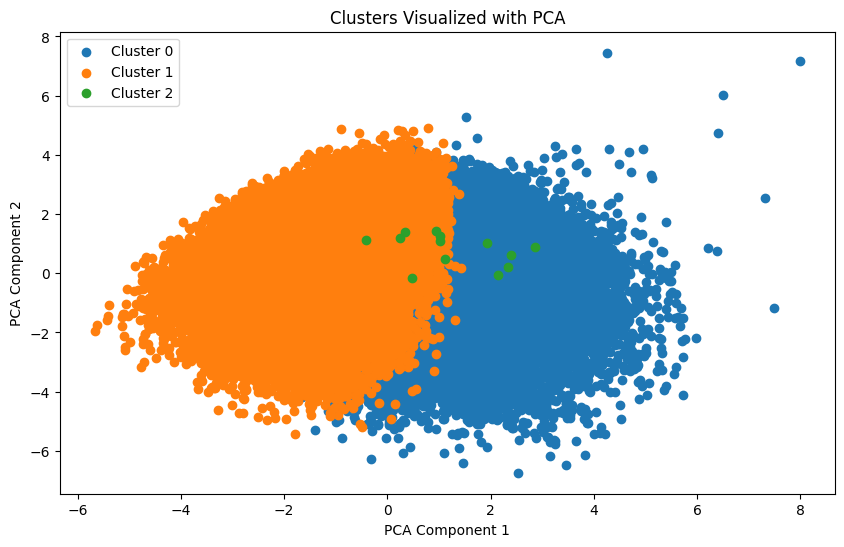

In [6]:
# Load your data into a DataFrame named 'data'

# Step 1: Encoding categorical variables
label_encoders = {}
for column in diabetic_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    diabetic_data[column] = le.fit_transform(diabetic_data[column].astype(str))
    label_encoders[column] = le

# Step 2: Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(diabetic_data)  # Scale the features

# Step 3: K-Means Clustering
n_clusters = 3  # Adjust based on domain knowledge or experimentation
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
diabetic_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Dimensionality Reduction (PCA for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
diabetic_data['PCA1'] = pca_data[:, 0]
diabetic_data['PCA2'] = pca_data[:, 1]

# Step 5: Evaluation Metrics
silhouette_avg = silhouette_score(scaled_data, diabetic_data['Cluster'])
davies_bouldin = davies_bouldin_score(scaled_data, diabetic_data['Cluster'])

print(f'Silhouette Score: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.3f}')

# Step 6: Plot Clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = diabetic_data[diabetic_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized with PCA')
plt.legend()
plt.show()


## From the clustering analysis, we can interpret the results as follows:

1. **Silhouette Score (0.048)**: The low silhouette score indicates poor clustering, as it suggests that the clusters are not well-separated and there is significant overlap between them. Ideally, a higher silhouette score (closer to 1) would reflect more distinct and meaningful clusters.

2. **Davies-Bouldin Index (3.010)**: This index quantifies how similar clusters are to each other, with lower values indicating better clustering quality. A Davies-Bouldin index above 2 is generally considered suboptimal, and in this case, a score of 3.010 suggests that the clusters may not represent meaningful groupings.

3. **PCA Plot Visualization**:
   - **Overlap**: The visualization shows considerable overlap between clusters, especially between the orange and blue clusters, indicating that the clusters may not be well-separated in the feature space.
   - **Cluster Separation**: The clusters are not well-separated, and there is no clear distinction between the groups. In well-defined clusters, we would expect to see distinct groups with minimal overlap.
   - **Cluster Size**: The green cluster has very few points, suggesting it may represent outliers or noise rather than a meaningful grouping.

### Conclusion
The clustering analysis does not appear very informative based on these metrics and the visualization. This could indicate that the data might not have a natural clustering structure.

## 2. DBSCAN Clustering

#### Overview
Here, we use DBSCAN (Density-Based Spatial Clustering of Applications with Noise), which identifies clusters based on the density of points. DBSCAN is well-suited for discovering clusters of arbitrary shapes and handling noise points.

#### Steps
1. **Scaling**: Standardize the data for consistent feature contribution.
2. **DBSCAN Application**: Set parameters (`eps` and `min_samples`) and fit the model.
3. **Evaluation**: Calculate silhouette score and Davies-Bouldin index for performance assessment.
4. **Visualization**: Use PCA to visualize clusters in a 2D plot.

#### Interpretation
Analyze the clustering performance based on silhouette score, Davies-Bouldin index, and the PCA visualization, with a focus on noise points and density-based structure.

### Conclusion
Summarize the findings from both clustering methods, discussing the strengths and limitations of each approach in capturing meaningful structure in the data. Include recommendations for further steps or alternative methods based on the results.

Silhouette Score: -0.102
Davies-Bouldin Index: 1.042


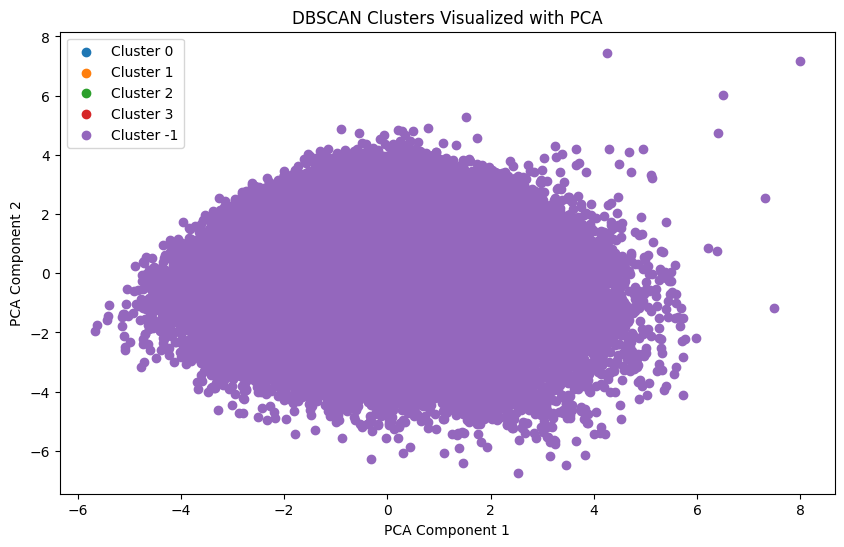

In [7]:
# Step 1: Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3)  # Adjust eps and min_samples as needed
diabetic_data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Step 2: Calculate Evaluation Metrics
if len(set(diabetic_data['DBSCAN_Cluster'])) > 1:  # Ensure more than one cluster for evaluation
    silhouette_avg = silhouette_score(scaled_data, diabetic_data['DBSCAN_Cluster'])
    davies_bouldin = davies_bouldin_score(scaled_data, diabetic_data['DBSCAN_Cluster'])
    print(f'Silhouette Score: {silhouette_avg:.3f}')
    print(f'Davies-Bouldin Index: {davies_bouldin:.3f}')
else:
    print("DBSCAN produced only one cluster; evaluation metrics cannot be calculated.")

# Step 3: Plot DBSCAN Clusters (if meaningful clusters are found)
plt.figure(figsize=(10, 6))
unique_clusters = set(diabetic_data['DBSCAN_Cluster'])
for cluster in unique_clusters:
    cluster_data = diabetic_data[diabetic_data['DBSCAN_Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clusters Visualized with PCA')
plt.legend()
plt.show()


## Interpretation of DBSCAN Clustering Results

From the DBSCAN clustering analysis, the following points can be observed:

1. **Silhouette Score (-0.102)**: The negative silhouette score indicates poor clustering quality, as it suggests that many points are likely misclassified or belong more closely to other clusters than to their assigned clusters. Ideally, a positive silhouette score closer to 1 would indicate better-defined clusters.

2. **Davies-Bouldin Index (1.042)**: The Davies-Bouldin index is relatively low, which might suggest better clustering compared to previous attempts, but in this case, the low silhouette score takes precedence, indicating suboptimal clustering.

3. **Cluster Visualization (PCA Plot)**:
   - **Cluster Overlap**: The PCA plot shows that clusters are not clearly separated. There is a high degree of overlap, making it difficult to distinguish between the different clusters in the data.
   - **Cluster `-1`**: DBSCAN assigns `-1` to points considered noise. In this plot, a significant portion of the data is labeled as `-1`, which could indicate that these points don’t fit well into any cluster according to DBSCAN's density-based criteria.
   - **Other Clusters**: Although some clusters (0, 1, 2, and 3) were identified, they are not distinct or well-separated. This suggests that the data may not have a clear density-based structure suitable for DBSCAN clustering.

### Conclusion
The results indicate that DBSCAN did not identify well-defined clusters in the data. The clustering appears to be uninformative, possibly due to a lack of natural cluster structure. Further preprocessing or trying other clustering methods (such as hierarchical clustering) might yield better insights.



## Handling Missing Values
### Replace placeholder values (e.g., '?') with `NaN` for cleaner data processing.

In [8]:
df_cleaned = df.replace('?', np.nan)

## Displaying Data
### Display the first few rows of the cleaned dataset to inspect initial data structure.##

In [9]:
df_cleaned.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Checking Null Values
### Check for missing values across each column to identify columns with incomplete data.

In [10]:
df_cleaned.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

## Dropping Columns with High Missing Rate

In [11]:
# Dropping 'weight' column due to its high missing rate
df_cleaned = df_cleaned.drop(columns=['weight'])

In [12]:
df_cleaned.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Age Group Distribution
### Visualize the distribution of 'age' to understand patient demographics.

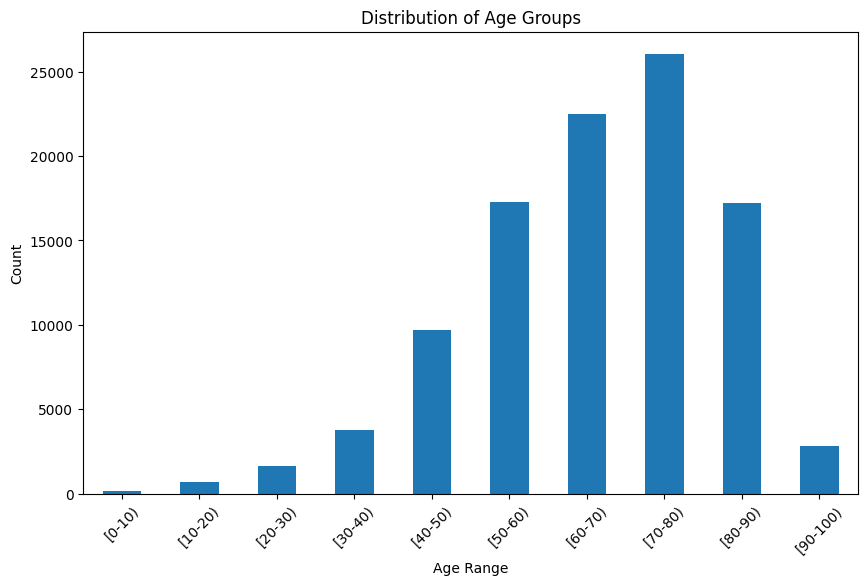

Age Group Distribution:
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


In [13]:
# Univariate analysis for 'age' column

# Display the distribution of 'age'
plt.figure(figsize=(10, 6))
df_cleaned['age'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Age Groups")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Display basic statistics
age_counts = df_cleaned['age'].value_counts()
print("Age Group Distribution:")
print(age_counts)

## Mapping Age Ranges
### Convert age ranges to numeric values (age decade) for more straightforward analysis.

In [14]:
# Map age ranges to the decade number
age_decade_mapping = {
    '[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4, '[40-50)': 5,
    '[50-60)': 6, '[60-70)': 7, '[70-80)': 8, '[80-90)': 9, '[90-100)': 10
}

# Create a new 'age_group' column with age decades
df_cleaned['age_decade'] = df_cleaned['age'].map(age_decade_mapping)

# Drop the original 'age' column
df_cleaned = df_cleaned.drop(columns=['age'])

# Verify by displaying the first few rows
df_cleaned[['age_decade']].head(10)

,age_decade
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


## Distribution of Race
### Plot the distribution of the 'race' feature to explore racial diversity and identify missing values.

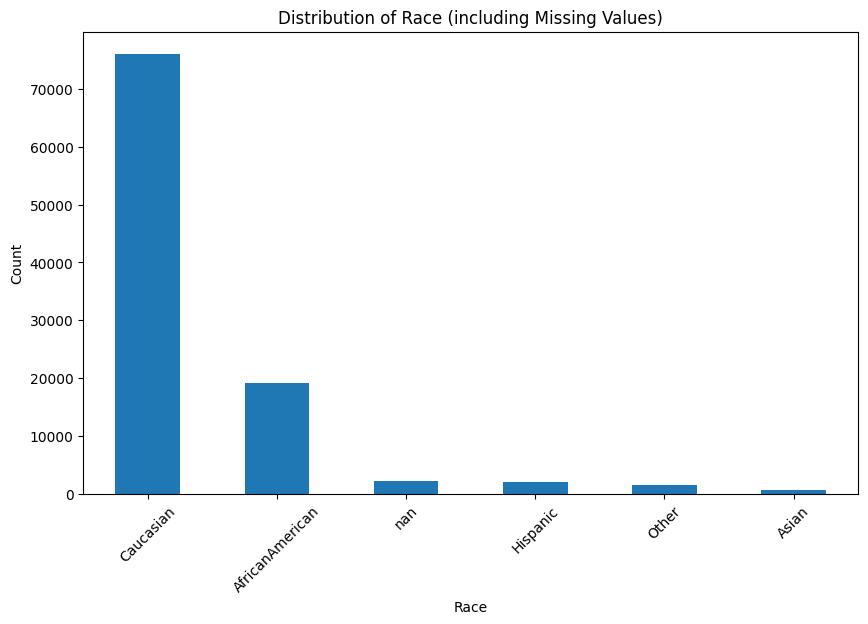

In [15]:
# Plot the distribution of the 'race' feature including missing values
plt.figure(figsize=(10, 6))
df_cleaned['race'].value_counts(dropna=False).plot(kind='bar')
plt.title('Distribution of Race (including Missing Values)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Imputing Missing Values in 'Race'
### Fill missing values in the 'race' column with the most frequent value to reduce bias from missing data.

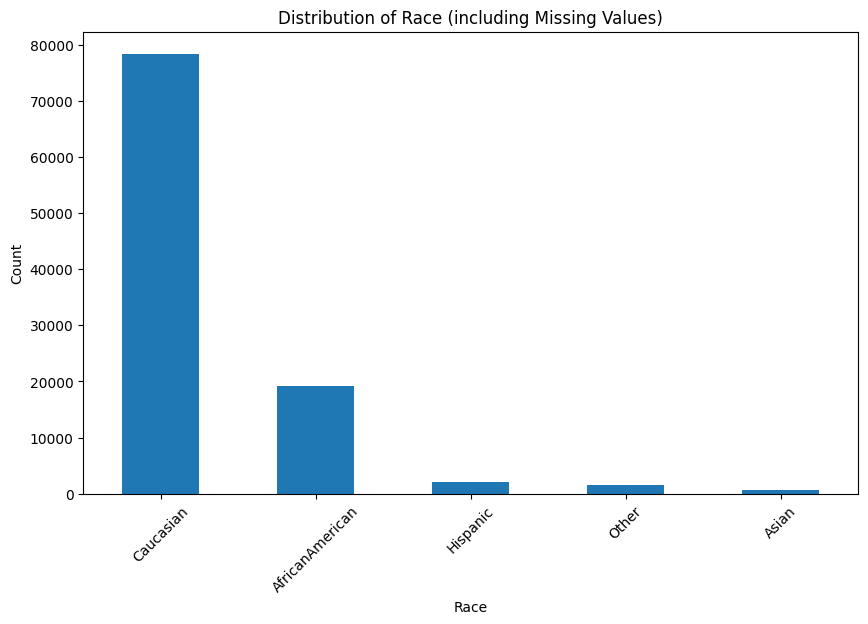

In [16]:
# Impute missing values in the 'race' column with the most frequent value
most_frequent_race = df_cleaned['race'].mode()[0]
df_cleaned['race'] = df_cleaned['race'].fillna(most_frequent_race)

# Verify that there are no missing values in 'race' after imputation
race_missing_after = df_cleaned['race'].isnull().sum()
race_missing_after

# Plot the distribution of the 'race' feature including missing values
plt.figure(figsize=(10, 6))
df_cleaned['race'].value_counts(dropna=False).plot(kind='bar')
plt.title('Distribution of Race (including Missing Values)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



## Distribution of Payer Code  
### Visualize the distribution of the 'payer_code' column, including missing values, to understand its data quality and variety.

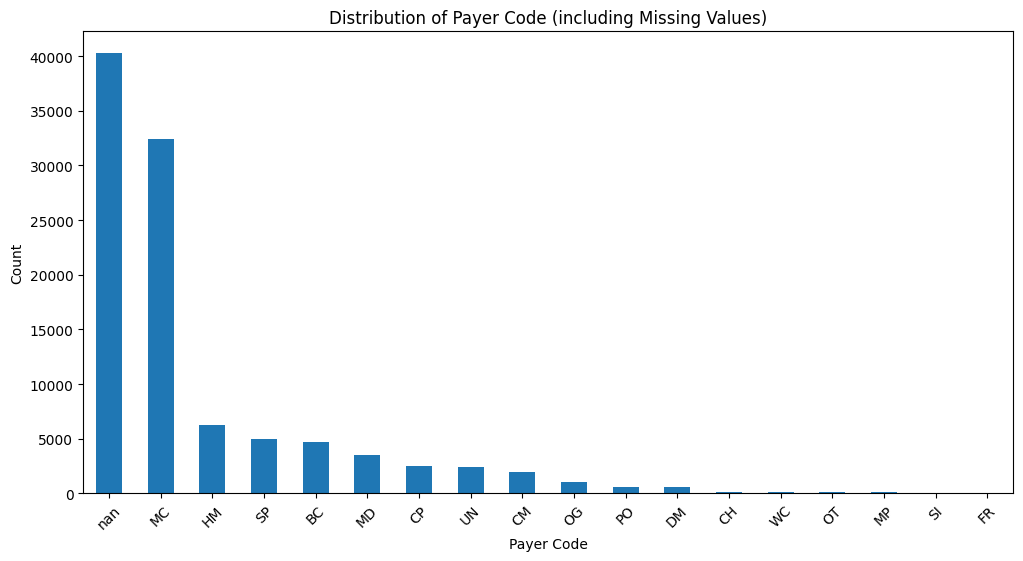

In [17]:
# Plot the distribution of the 'payer_code' feature including missing values
plt.figure(figsize=(12, 6))
df_cleaned['payer_code'].value_counts(dropna=False).plot(kind='bar')
plt.title('Distribution of Payer Code (including Missing Values)')
plt.xlabel('Payer Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Readmission Status by Payer Code  
### Create a contingency table to analyze the relationship between 'payer_code' and 'readmission' status with a stacked bar chart.

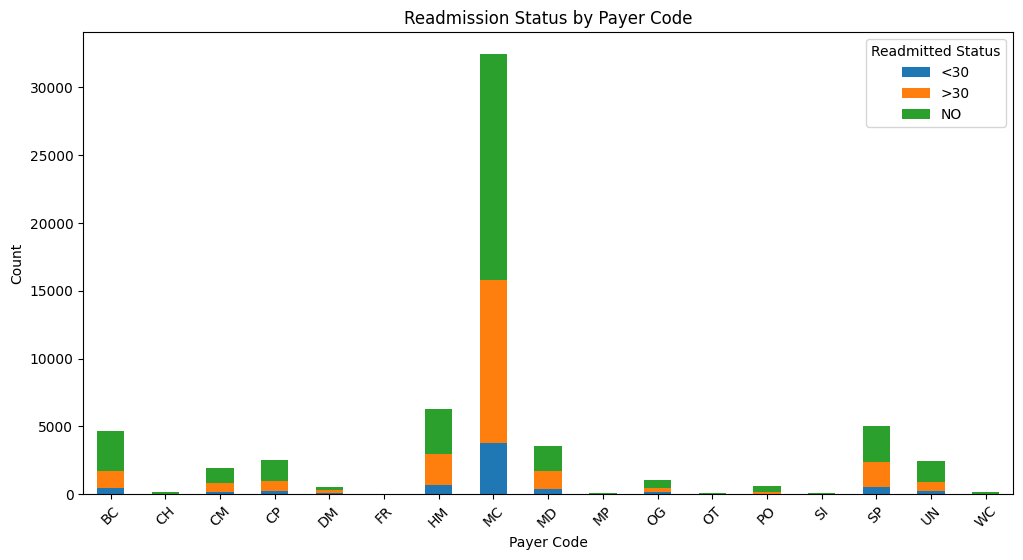

In [18]:
# Create a contingency table of 'payer_code' and 'readmitted'
contingency_table = pd.crosstab(df_cleaned['payer_code'], df_cleaned['readmitted'])

# Plot the relationship between 'payer_code' and 'readmitted' with a stacked bar chart
contingency_table.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Readmission Status by Payer Code")
plt.xlabel("Payer Code")
plt.ylabel("Count")
plt.legend(title="Readmitted Status")
plt.xticks(rotation=45)
plt.show()


## Readmission vs. Payer Code  
### Display the distribution of 'payer_code' across readmission categories for further insights into payer code impact.


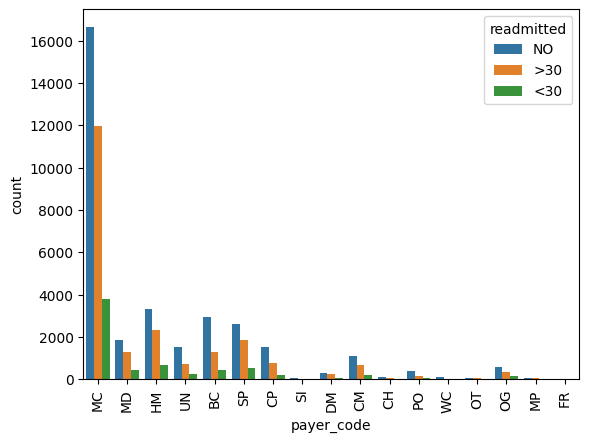

In [19]:
# Check distribution of `payer_code` across target values
sns.countplot(data=df_cleaned, x='payer_code', hue='readmitted')
plt.xticks(rotation=90)
plt.show()

## Dropping Payer Code Column  
### Drop the 'payer_code' column as it may not be relevant or useful for predictive modeling.

In [20]:
# Drop the `payer_code` column from the dataframe
df_cleaned = df_cleaned.drop(columns=['payer_code'])

# Verify that the column has been removed
print("Columns after dropping `payer_code`:", df_cleaned.columns)
df_cleaned.head(5)

Columns after dropping `payer_code`: Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_decade'],
      dtype='object')


,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_decade
0,2278392,8222157,Caucasian,Female,6,25,1,1,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,NO,1
1,149190,55629189,Caucasian,Female,1,1,7,3,NaN,59,...,Up,No,No,No,No,No,Ch,Yes,>30,2
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,NaN,11,...,No,No,No,No,No,No,No,Yes,NO,3
3,500364,82442376,Caucasian,Male,1,1,7,2,NaN,44,...,Up,No,No,No,No,No,Ch,Yes,NO,4
4,16680,42519267,Caucasian,Male,1,1,7,1,NaN,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,5


## Medical Specialty by Readmission Status  
### Plot the distribution of 'medical_specialty' by readmission status to check for any relationship patterns.

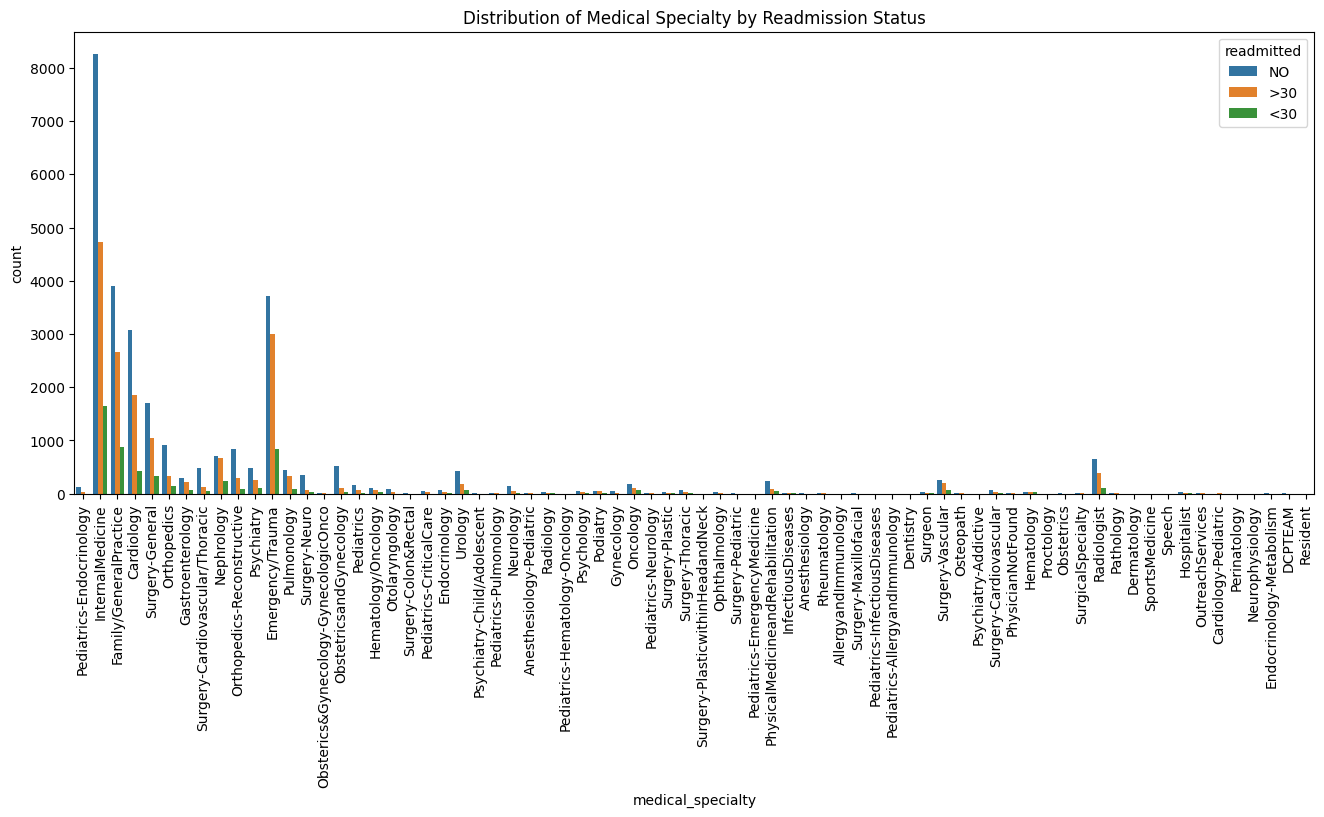

In [21]:
# Set a larger figure size to make the graph wider
plt.figure(figsize=(16, 6))

# Visualize the distribution of `medical_specialty` by the target variable `readmitted`
sns.countplot(data=df_cleaned, x='medical_specialty', hue='readmitted')
plt.xticks(rotation=90)
plt.title("Distribution of Medical Specialty by Readmission Status")
plt.show()

## Dropping Medical Specialty Column  
### Drop 'medical_specialty' from the dataset as it may not be essential for the analysis.

In [22]:
# Drop the `medical_specialty` column from the dataframe
df_cleaned = df_cleaned.drop(columns=['medical_specialty'])

# Verify that the column has been removed
print("Columns after dropping `medical_specialty`:", df_cleaned.columns)
df_cleaned.head(5)

Columns after dropping `medical_specialty`: Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_decade'],
      dtype='object')


,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_decade
0,2278392,8222157,Caucasian,Female,6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,NO,1
1,149190,55629189,Caucasian,Female,1,1,7,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,>30,2
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,11,5,...,No,No,No,No,No,No,No,Yes,NO,3
3,500364,82442376,Caucasian,Male,1,1,7,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,4
4,16680,42519267,Caucasian,Male,1,1,7,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,5


## Dropping Rows with Missing Diagnoses  
### Remove rows where any of the diagnosis columns ('diag_1', 'diag_2', 'diag_3') are missing to maintain data integrity.

In [23]:
# Drop rows where 'diag_1', 'diag_2', or 'diag_3' have missing values
df_cleaned = df_cleaned.dropna(subset=['diag_1', 'diag_2', 'diag_3'])

## Verifying Missing Values Removal  
### Verify that no missing values remain in the dataset after the cleaning process.

In [24]:
# Verify that the missing values are removed
df_cleaned.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               94981
A1Cresult                   83645
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone  

## Distribution of max_glu_serum by Readmission Status  
### Visualize 'max_glu_serum' by readmission status to identify any trends in glucose levels related to readmission.

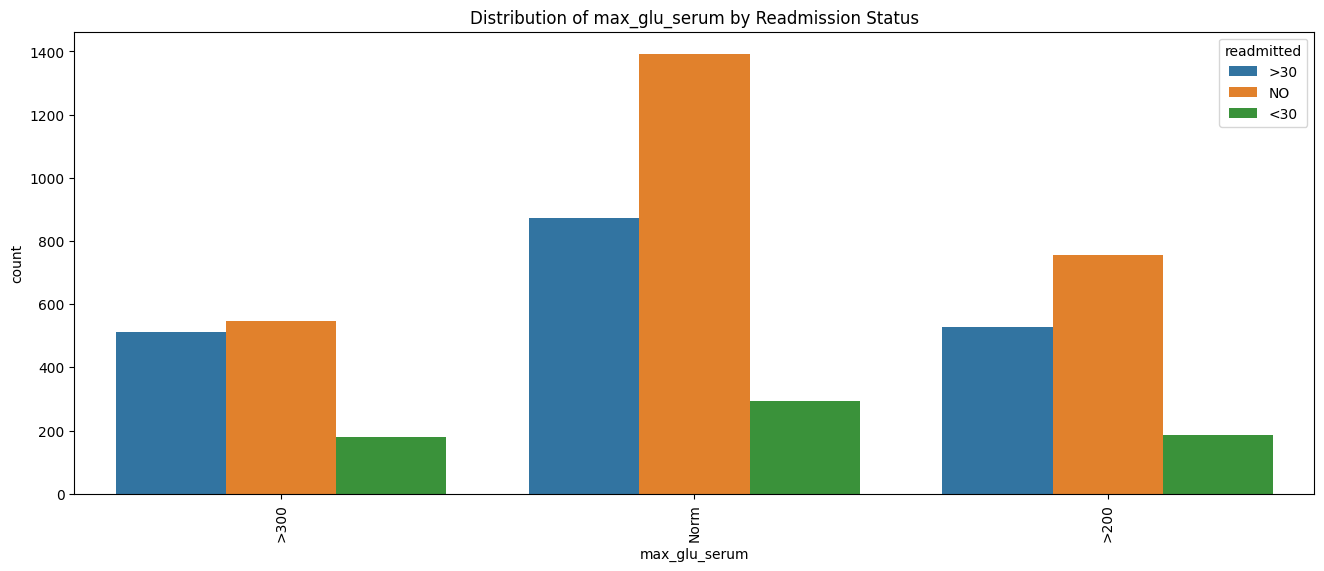

In [25]:
# Set a larger figure size to make the graph wider
plt.figure(figsize=(16, 6))

# Visualize the distribution of `max_glu_serum` by the target variable `readmitted`
sns.countplot(data=df_cleaned, x='max_glu_serum', hue='readmitted')
plt.xticks(rotation=90)
plt.title("Distribution of max_glu_serum by Readmission Status")
plt.show()

## Dropping max_glu_serum Column  
### Remove the 'max_glu_serum' column as it may not contribute significant information for modeling.

In [26]:
# Drop the `max_glu_serum` column from the dataframe
df_cleaned = df_cleaned.drop(columns=['max_glu_serum'])

# Verify that the column has been removed
print("Columns after dropping `max_glu_serum`:", df_cleaned.columns)
df_cleaned.head(5)

Columns after dropping `max_glu_serum`: Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_decade'],
      dtype='object')


,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_decade
1,149190,55629189,Caucasian,Female,1,1,7,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,>30,2
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,11,5,...,No,No,No,No,No,No,No,Yes,NO,3
3,500364,82442376,Caucasian,Male,1,1,7,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,4
4,16680,42519267,Caucasian,Male,1,1,7,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,5
5,35754,82637451,Caucasian,Male,2,1,2,3,31,6,...,Steady,No,No,No,No,No,No,Yes,>30,6


## Verifying Missing Values Again  
### Double-check for any remaining missing values after further data cleaning steps.

In [27]:
# Verify that the missing values are removed
df_cleaned.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
A1Cresult                   83645
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

## Distribution of A1C Result by Readmission Status  
### Visualize the 'A1Cresult' distribution by readmission status to check for trends in glycemic control outcomes.

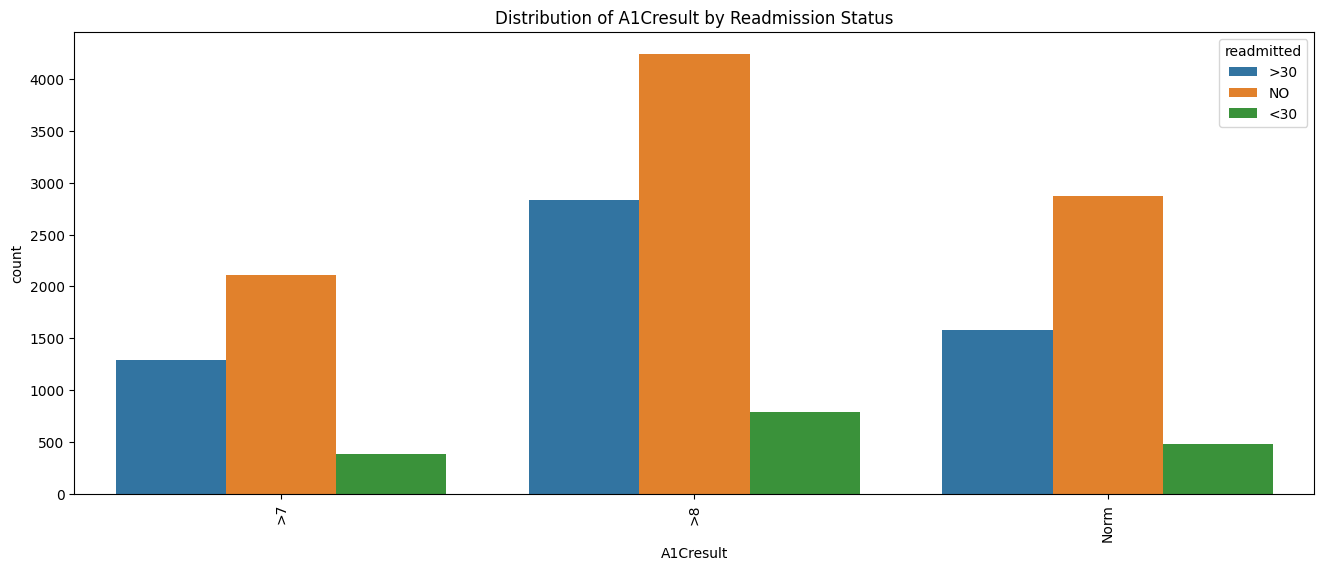

In [28]:
# Set a larger figure size to make the graph wider
plt.figure(figsize=(16, 6))

# Visualize the distribution of `A1Cresult` by the target variable `readmitted`
sns.countplot(data=df_cleaned, x='A1Cresult', hue='readmitted')
plt.xticks(rotation=90)
plt.title("Distribution of A1Cresult by Readmission Status")
plt.show()

## Dropping A1Cresult Column  
### Drop the 'A1Cresult' column, possibly due to limited variance.

In [29]:
# Drop the `A1Cresult` column from the dataframe
df_cleaned = df_cleaned.drop(columns=['A1Cresult'])

# Verify that the column has been removed
print("Columns after dropping `A1Cresult`:", df_cleaned.columns)
df_cleaned.head(5)

Columns after dropping `A1Cresult`: Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'age_decade'],
      dtype='object')


,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_decade
1,149190,55629189,Caucasian,Female,1,1,7,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,>30,2
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,11,5,...,No,No,No,No,No,No,No,Yes,NO,3
3,500364,82442376,Caucasian,Male,1,1,7,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,4
4,16680,42519267,Caucasian,Male,1,1,7,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,5
5,35754,82637451,Caucasian,Male,2,1,2,3,31,6,...,Steady,No,No,No,No,No,No,Yes,>30,6


In [30]:

# Verify that the missing values are removed
df_cleaned.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide   

## Medication Columns with Single Unique Value  
### Identify and drop medication columns that contain only a single unique value, as these lack variability.

In [31]:
medication_columns = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]

# Identify medication columns with only one unique value in df_cleaned
single_value_medications = {col: df_cleaned[col].unique() for col in medication_columns if df_cleaned[col].nunique() == 1}

# Extract column names from the dictionary for columns to drop
columns_to_drop = list(single_value_medications.keys())

# Display the cleaned dataframe's columns to confirm removal
print("Dropped Columns:", columns_to_drop)

# Dropping these columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

Dropped Columns: ['examide', 'citoglipton']


## Displaying Two-Value Medication Columns  
### Generate a summary of medications with two unique values to assess their distributions and potential impact.

In [32]:
# Generate dictionary with unique values and their counts for medications with two unique values
two_value_medications = {col: df[col].value_counts() for col in medication_columns if df[col].nunique() == 2}

# Print each entry with counts in a readable format
for col, value_counts in two_value_medications.items():
    print(f"Medication: {col}")
    print("Values and Counts:")
    for value, count in value_counts.items():
        print(f"  - {value}: {count}")
    print("-" * 30)  # Separator for readability


Medication: acetohexamide
Values and Counts:
  - No: 101765
  - Steady: 1
------------------------------
Medication: tolbutamide
Values and Counts:
  - No: 101743
  - Steady: 23
------------------------------
Medication: troglitazone
Values and Counts:
  - No: 101763
  - Steady: 3
------------------------------
Medication: glipizide-metformin
Values and Counts:
  - No: 101753
  - Steady: 13
------------------------------
Medication: glimepiride-pioglitazone
Values and Counts:
  - No: 101765
  - Steady: 1
------------------------------
Medication: metformin-rosiglitazone
Values and Counts:
  - No: 101764
  - Steady: 2
------------------------------
Medication: metformin-pioglitazone
Values and Counts:
  - No: 101765
  - Steady: 1
------------------------------


## Dropping Two-Value Medication Columns  
### Drop medication columns with two unique values if they don't provide meaningful distinctions.

In [33]:
# Extract column names from the dictionary for columns to drop
columns_to_drop = list(two_value_medications.keys())

# Display the cleaned dataframe's columns to confirm removal
print("Dropped Columns:", columns_to_drop)

# Dropping these columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

Dropped Columns: ['acetohexamide', 'tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


## Three-Value Medication Columns  
### Identify medications with three unique values, printing their counts to evaluate relevance for inclusion or removal.

In [34]:
# Generate dictionary with unique values and their counts for medications with three unique values
three_value_medications = {col: df[col].value_counts() for col in medication_columns if df[col].nunique() == 3}

# Print each entry with counts in a readable format
for col, value_counts in three_value_medications.items():
    print(f"Medication: {col}")
    print("Values and Counts:")
    for value, count in value_counts.items():
        print(f"  - {value}: {count}")
    print("-" * 30)  # Separator for readability

Medication: tolazamide
Values and Counts:
  - No: 101727
  - Steady: 38
  - Up: 1
------------------------------


## Dropping Three-Value Medication Columns  
### Drop medication columns with three unique values if they provide limited variability for analysis.

In [35]:
# Extract column names from the dictionary for columns to drop
columns_to_drop = list(three_value_medications.keys())

# Display the cleaned dataframe's columns to confirm removal
print("Dropped Columns:", columns_to_drop)

# Dropping these columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

Dropped Columns: ['tolazamide']


## Displaying Four-Value Medication Columns  
### Summarize medications with four unique values for further inspection and consideration.

In [36]:
# Generate dictionary with unique values and their counts for medications with 4 unique values
four_value_medications = {col: df[col].value_counts() for col in medication_columns if df[col].nunique() == 4}

# Print each entry with counts in a readable format
for col, value_counts in four_value_medications.items():
    print(f"Medication: {col}")
    print("Values and Counts:")
    for value, count in value_counts.items():
        print(f"  - {value}: {count}")
    print("-" * 30)  # Separator for readability

Medication: metformin
Values and Counts:
  - No: 81778
  - Steady: 18346
  - Up: 1067
  - Down: 575
------------------------------
Medication: repaglinide
Values and Counts:
  - No: 100227
  - Steady: 1384
  - Up: 110
  - Down: 45
------------------------------
Medication: nateglinide
Values and Counts:
  - No: 101063
  - Steady: 668
  - Up: 24
  - Down: 11
------------------------------
Medication: chlorpropamide
Values and Counts:
  - No: 101680
  - Steady: 79
  - Up: 6
  - Down: 1
------------------------------
Medication: glimepiride
Values and Counts:
  - No: 96575
  - Steady: 4670
  - Up: 327
  - Down: 194
------------------------------
Medication: glipizide
Values and Counts:
  - No: 89080
  - Steady: 11356
  - Up: 770
  - Down: 560
------------------------------
Medication: glyburide
Values and Counts:
  - No: 91116
  - Steady: 9274
  - Up: 812
  - Down: 564
------------------------------
Medication: pioglitazone
Values and Counts:
  - No: 94438
  - Steady: 6976
  - Up: 234
  -

## Medication Columns with Minimal Variability  
### Identify columns with minimal variability (e.g., where 90% or more of data is in one category) and remove them as they contribute little to predictive power.

In [37]:
# Set a threshold for minimal variability (e.g., 90% or more of one category)
threshold = 0.9

# Identify medication columns with minimal variability in df_cleaned
minimal_variability_medications_cleaned = [
    col for col in medication_columns
    if col in df_cleaned.columns and df_cleaned[col].value_counts(normalize=True).max() >= threshold
]

# Display the identified columns for removal
print("Medication columns with minimal contribution to variability (to be removed):")
for col in minimal_variability_medications_cleaned:
    main_value = df_cleaned[col].value_counts(normalize=True).idxmax()
    main_value_percent = df_cleaned[col].value_counts(normalize=True).max() * 100
    print(f"{col}: {main_value} ({main_value_percent:.2f}%)")

# Remove these columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=minimal_variability_medications_cleaned)

# Display remaining columns in df_cleaned to confirm removal
print("\nRemaining columns in df_cleaned:")
print(df_cleaned.columns.tolist())

Medication columns with minimal contribution to variability (to be removed):
repaglinide: No (98.47%)
nateglinide: No (99.30%)
chlorpropamide: No (99.92%)
glimepiride: No (94.87%)
pioglitazone: No (92.77%)
rosiglitazone: No (93.71%)
acarbose: No (99.70%)
miglitol: No (99.96%)
glyburide-metformin: No (99.31%)

Remaining columns in df_cleaned:
['encounter_id', 'patient_nbr', 'race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change', 'diabetesMed', 'readmitted', 'age_decade']


## Summary of Four-Value Medication Columns  
### Display unique values and counts for remaining medication columns with four distinct values to ensure data completeness.

In [38]:
remaining_medication_columns = ['metformin','glipizide','glyburide','insulin']
# Generate dictionary with unique values and their counts for medications with 4 unique values
four_value_medications_remaining = {col: df[col].value_counts() for col in remaining_medication_columns if df[col].nunique() == 4}

# Print each entry with counts in a readable format
for col, value_counts in four_value_medications_remaining.items():
    print(f"Medication: {col}")
    print("Values and Counts:")
    for value, count in value_counts.items():
        print(f"  - {value}: {count}")
    print("-" * 30)  # Separator for readability

Medication: metformin
Values and Counts:
  - No: 81778
  - Steady: 18346
  - Up: 1067
  - Down: 575
------------------------------
Medication: glipizide
Values and Counts:
  - No: 89080
  - Steady: 11356
  - Up: 770
  - Down: 560
------------------------------
Medication: glyburide
Values and Counts:
  - No: 91116
  - Steady: 9274
  - Up: 812
  - Down: 564
------------------------------
Medication: insulin
Values and Counts:
  - No: 47383
  - Steady: 30849
  - Down: 12218
  - Up: 11316
------------------------------


## Transforming Medication Values  
### Combine categories in medication columns by converting "Up" and "Down" statuses to "Steady" for a more simplified view.

In [39]:
# Define the columns to transform
medications_to_transform = ['metformin', 'glipizide', 'glyburide', 'insulin']

# Loop over each medication column and transform values
for col in medications_to_transform:
    # Replace "Up" and "Down" with "Steady" to combine them
    df_cleaned[col] = df_cleaned[col].replace({"Up": "Steady", "Down": "Steady"})

    # Optionally, print the unique values to verify the transformation
    print(f"Unique values for {col} after transformation: {df_cleaned[col].value_counts()}")


Unique values for metformin after transformation: metformin
No        80543
Steady    19701
Name: count, dtype: int64
Unique values for glipizide after transformation: glipizide
No        87682
Steady    12562
Name: count, dtype: int64
Unique values for glyburide after transformation: glyburide
No        89719
Steady    10525
Name: count, dtype: int64
Unique values for insulin after transformation: insulin
Steady    53442
No        46802
Name: count, dtype: int64


## Dataset Shape  
### Check the final dataset shape to confirm remaining rows and columns after cleaning.

In [40]:
df_cleaned.shape

(100244, 26)

## Gender Distribution  
### Display unique values and counts in the 'gender' column for a quick overview of gender representation.

In [41]:
# Display unique values in the 'gender' column with their counts
print("Values and Counts for 'gender':\n")
for value, count in df_cleaned['gender'].value_counts().items():
    print(f"- {value}: {count}")

Values and Counts for 'gender':

- Female: 53922
- Male: 46319
- Unknown/Invalid: 3


## Removing Invalid Gender Rows  
### Exclude rows with 'Unknown/Invalid' gender values to improve data quality and validity.

In [42]:
# Remove rows where 'gender' is 'Unknown/Invalid'
df_cleaned = df_cleaned[df_cleaned['gender'] != 'Unknown/Invalid']

# Verify removal by printing the counts again
print("Values and Counts for 'gender' after removal:\n")
for value, count in df_cleaned['gender'].value_counts().items():
    print(f"- {value}: {count}")

Values and Counts for 'gender' after removal:

- Female: 53922
- Male: 46319


## Assessing Uniqueness of Identifiers  
### Check the uniqueness of 'encounter_id' and 'patient_nbr' columns to determine if they serve as identifiers.

In [43]:
# Check uniqueness of encounter_id and patient_nbr
encounter_id_unique = df_cleaned['encounter_id'].nunique()
patient_nbr_unique = df_cleaned['patient_nbr'].nunique()
total_rows = df_cleaned.shape[0]

print(f"Total rows: {total_rows}")
print(f"Unique values in encounter_id: {encounter_id_unique}")
print(f"Unique values in patient_nbr: {patient_nbr_unique}")

# Quick assessment
if encounter_id_unique == total_rows:
    print("encounter_id has unique values for each row, suggesting it may act as an identifier.")
if patient_nbr_unique == total_rows:
    print("patient_nbr has unique values for each row, suggesting it may act as an identifier.")
elif patient_nbr_unique > total_rows * 0.9:
    print("patient_nbr is nearly unique and may act as an identifier.")


Total rows: 100241
Unique values in encounter_id: 100241
Unique values in patient_nbr: 70413
encounter_id has unique values for each row, suggesting it may act as an identifier.


## Dropping encounter_id Column  
### Drop 'encounter_id' column, which serves as a unique identifier but is not relevant for analysis.

In [44]:
# Drop encounter id
df_cleaned = df_cleaned.drop(columns=['encounter_id'])

# Verify that the column has been removed
print("Columns after dropping `encounter_id`:", df_cleaned.columns)
df_cleaned.head(5)

Columns after dropping `encounter_id`: Index(['patient_nbr', 'race', 'gender', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'glipizide',
       'glyburide', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'age_decade'],
      dtype='object')


,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diag_3,number_diagnoses,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,age_decade
1,55629189,Caucasian,Female,1,1,7,3,59,0,18,...,255,9,No,No,No,Steady,Ch,Yes,>30,2
2,86047875,AfricanAmerican,Female,1,1,7,2,11,5,13,...,V27,6,No,Steady,No,No,No,Yes,NO,3
3,82442376,Caucasian,Male,1,1,7,2,44,1,16,...,403,7,No,No,No,Steady,Ch,Yes,NO,4
4,42519267,Caucasian,Male,1,1,7,1,51,0,8,...,250,5,No,Steady,No,Steady,Ch,Yes,NO,5
5,82637451,Caucasian,Male,2,1,2,3,31,6,16,...,250,9,No,No,No,Steady,No,Yes,>30,6


### Encode 'readmitted' as a numeric variable and calculate its correlation with 'patient_nbr' to check any potential relationship.

In [45]:
# Calculate the correlation between patient_nbr and readmitted, if readmitted is encoded in a suitable format
# First, check if the readmitted column is binary or categorical, and convert it if necessary.

# If 'readmitted' is categorical, map it to numeric values (assuming 'No' and 'Yes' or similar categories)
if df_cleaned['readmitted'].dtype == 'object':
    df_cleaned['readmitted'] = df_cleaned['readmitted'].map({'NO': 0, '>30': 0, '<30': 1})

# Now calculate the correlation between 'patient_nbr' and 'readmitted'
correlation_patient_nbr_readmitted = df_cleaned[['patient_nbr', 'readmitted']].corr().iloc[0, 1]

# Display the correlation result
correlation_patient_nbr_readmitted

np.float64(0.0064542135823373314)

## Dropping patient_nbr Column  
### Remove 'patient_nbr' since it serves as an identifier and holds no predictive value for modeling.

In [46]:
# Drop patient_nbr
df_cleaned = df_cleaned.drop(columns=['patient_nbr'])

# Verify that the column has been removed
print("Columns after dropping `patient_nbr`:", df_cleaned.columns)

Columns after dropping `patient_nbr`: Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'glipizide', 'glyburide', 'insulin',
       'change', 'diabetesMed', 'readmitted', 'age_decade'],
      dtype='object')


## Flagging Unlikely Readmissions  
### Create a new column based on discharge disposition IDs to flag patients unlikely to be readmitted. (Dead)

In [47]:
# Define the discharge disposition IDs that indicate unlikely readmission
non_readmission_dispositions = [11, 13, 14, 19, 20, 21]

# Create a new column in the dataset to flag patients unlikely to be readmitted
df_cleaned['unlikely_to_be_readmitted'] = df_cleaned['discharge_disposition_id'].isin(non_readmission_dispositions).astype(int)

# Verify the result by checking the distribution of this new column
print(df_cleaned['unlikely_to_be_readmitted'].value_counts())

unlikely_to_be_readmitted
0    97822
1     2419
Name: count, dtype: int64


## Filtering Out Unlikely Readmissions  
### Filter out patients flagged as unlikely to be readmitted to refine the target population for analysis.

In [48]:
# Filter out rows where 'unlikely_to_be_readmitted' is 1
df_cleaned = df_cleaned[df_cleaned['unlikely_to_be_readmitted'] == 0].drop(columns=['unlikely_to_be_readmitted'])

# Verify the shape of the filtered data
df_cleaned.shape

(97822, 24)

## Boxplots for Numerical Features  
### Visualize the distribution of numerical features with boxplots to identify potential outliers.

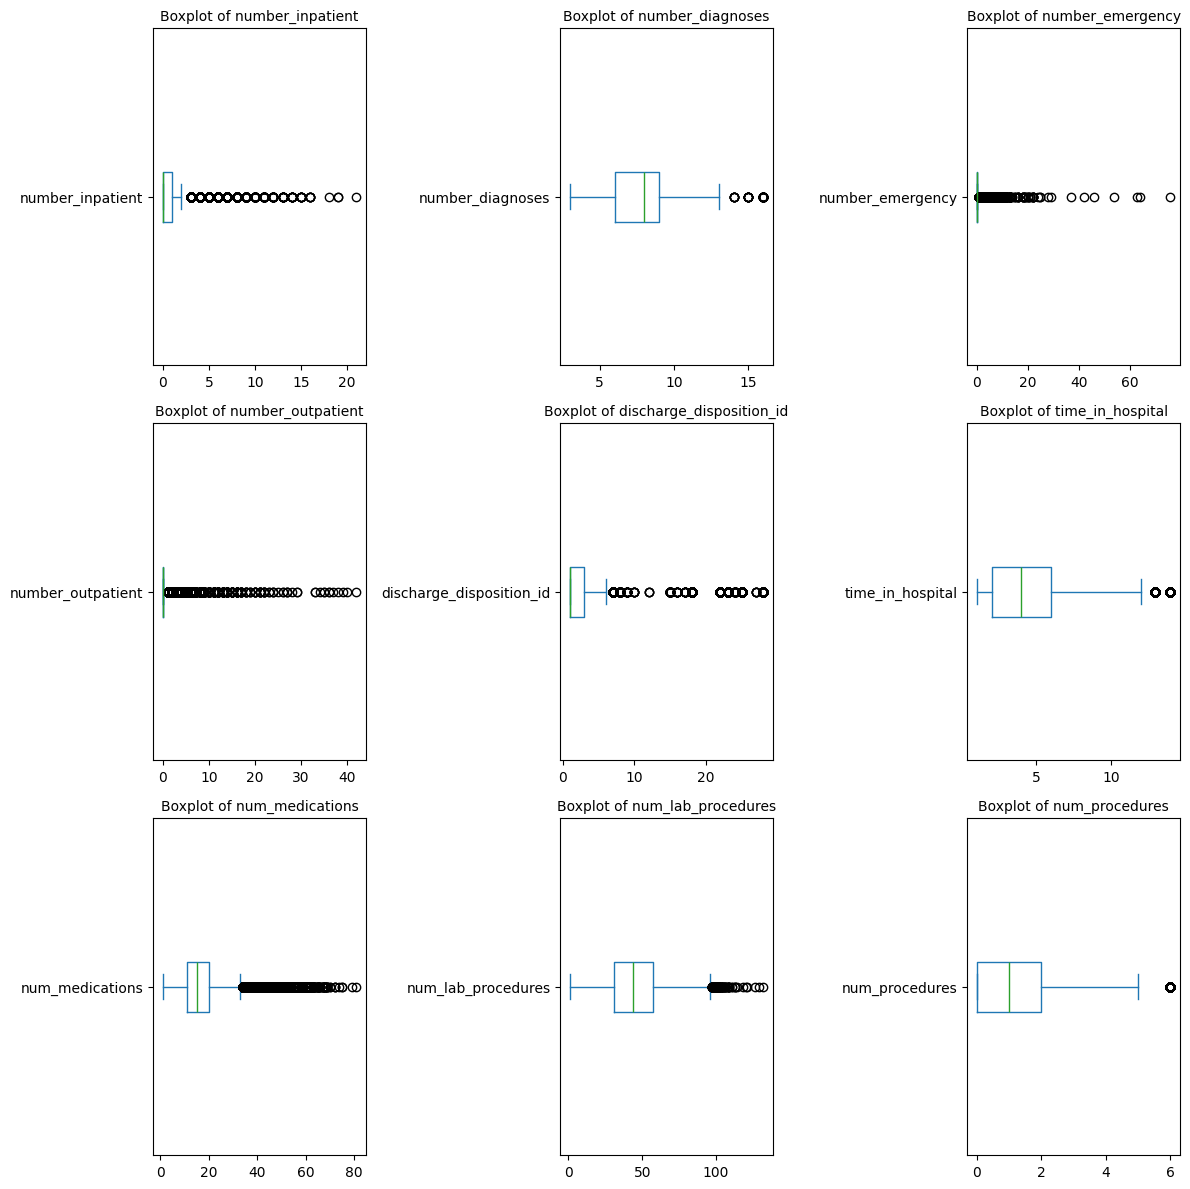

In [49]:
# List of numerical columns to analyze
numerical_features = [
    'number_inpatient', 'number_diagnoses', 'number_emergency', 'number_outpatient',
    'discharge_disposition_id', 'time_in_hospital', 'num_medications', 'num_lab_procedures',
    'num_procedures'
]

# Set up figure dimensions for a more compact layout
plt.figure(figsize=(12, 12))
rows, cols = 3, 3  # Arrange in a 3x3 grid

# Create boxplots for each feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    df_cleaned[feature].plot(kind='box', vert=False)
    plt.title(f'Boxplot of {feature}', fontsize=10)

plt.tight_layout()
plt.show()

## Outlier Analysis  
### Calculate outliers in key features using interquartile range (IQR) and store their counts and percentages for review.

In [50]:

# Initialize a dictionary to store outlier information for each feature
outlier_info = {}

for feature in numerical_features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[feature] < lower_bound) | (df_cleaned[feature] > upper_bound)]

    # Calculate outlier count and percentage
    outlier_count = outliers.shape[0]
    total_count = df_cleaned.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100

    # Store in dictionary
    outlier_info[feature] = {
        "Outlier Count": outlier_count,
        "Outlier Percentage": outlier_percentage
    }

# Convert the dictionary to a DataFrame for better visualization
outlier_df = pd.DataFrame(outlier_info).T
display(outlier_df)
df_cleaned.shape

,Outlier Count,Outlier Percentage
number_inpatient,6753.0,6.903355
number_diagnoses,58.0,0.059291
number_emergency,10997.0,11.241847
number_outpatient,16222.0,16.583182
discharge_disposition_id,8005.0,8.183231
time_in_hospital,2141.0,2.188669
num_medications,3253.0,3.325428
num_lab_procedures,120.0,0.122672
num_procedures,4787.0,4.893582


(97822, 24)

## Boxplots (Detailed)  
### Display more detailed boxplots for numerical features, providing a visual reference for outlier tendencies.

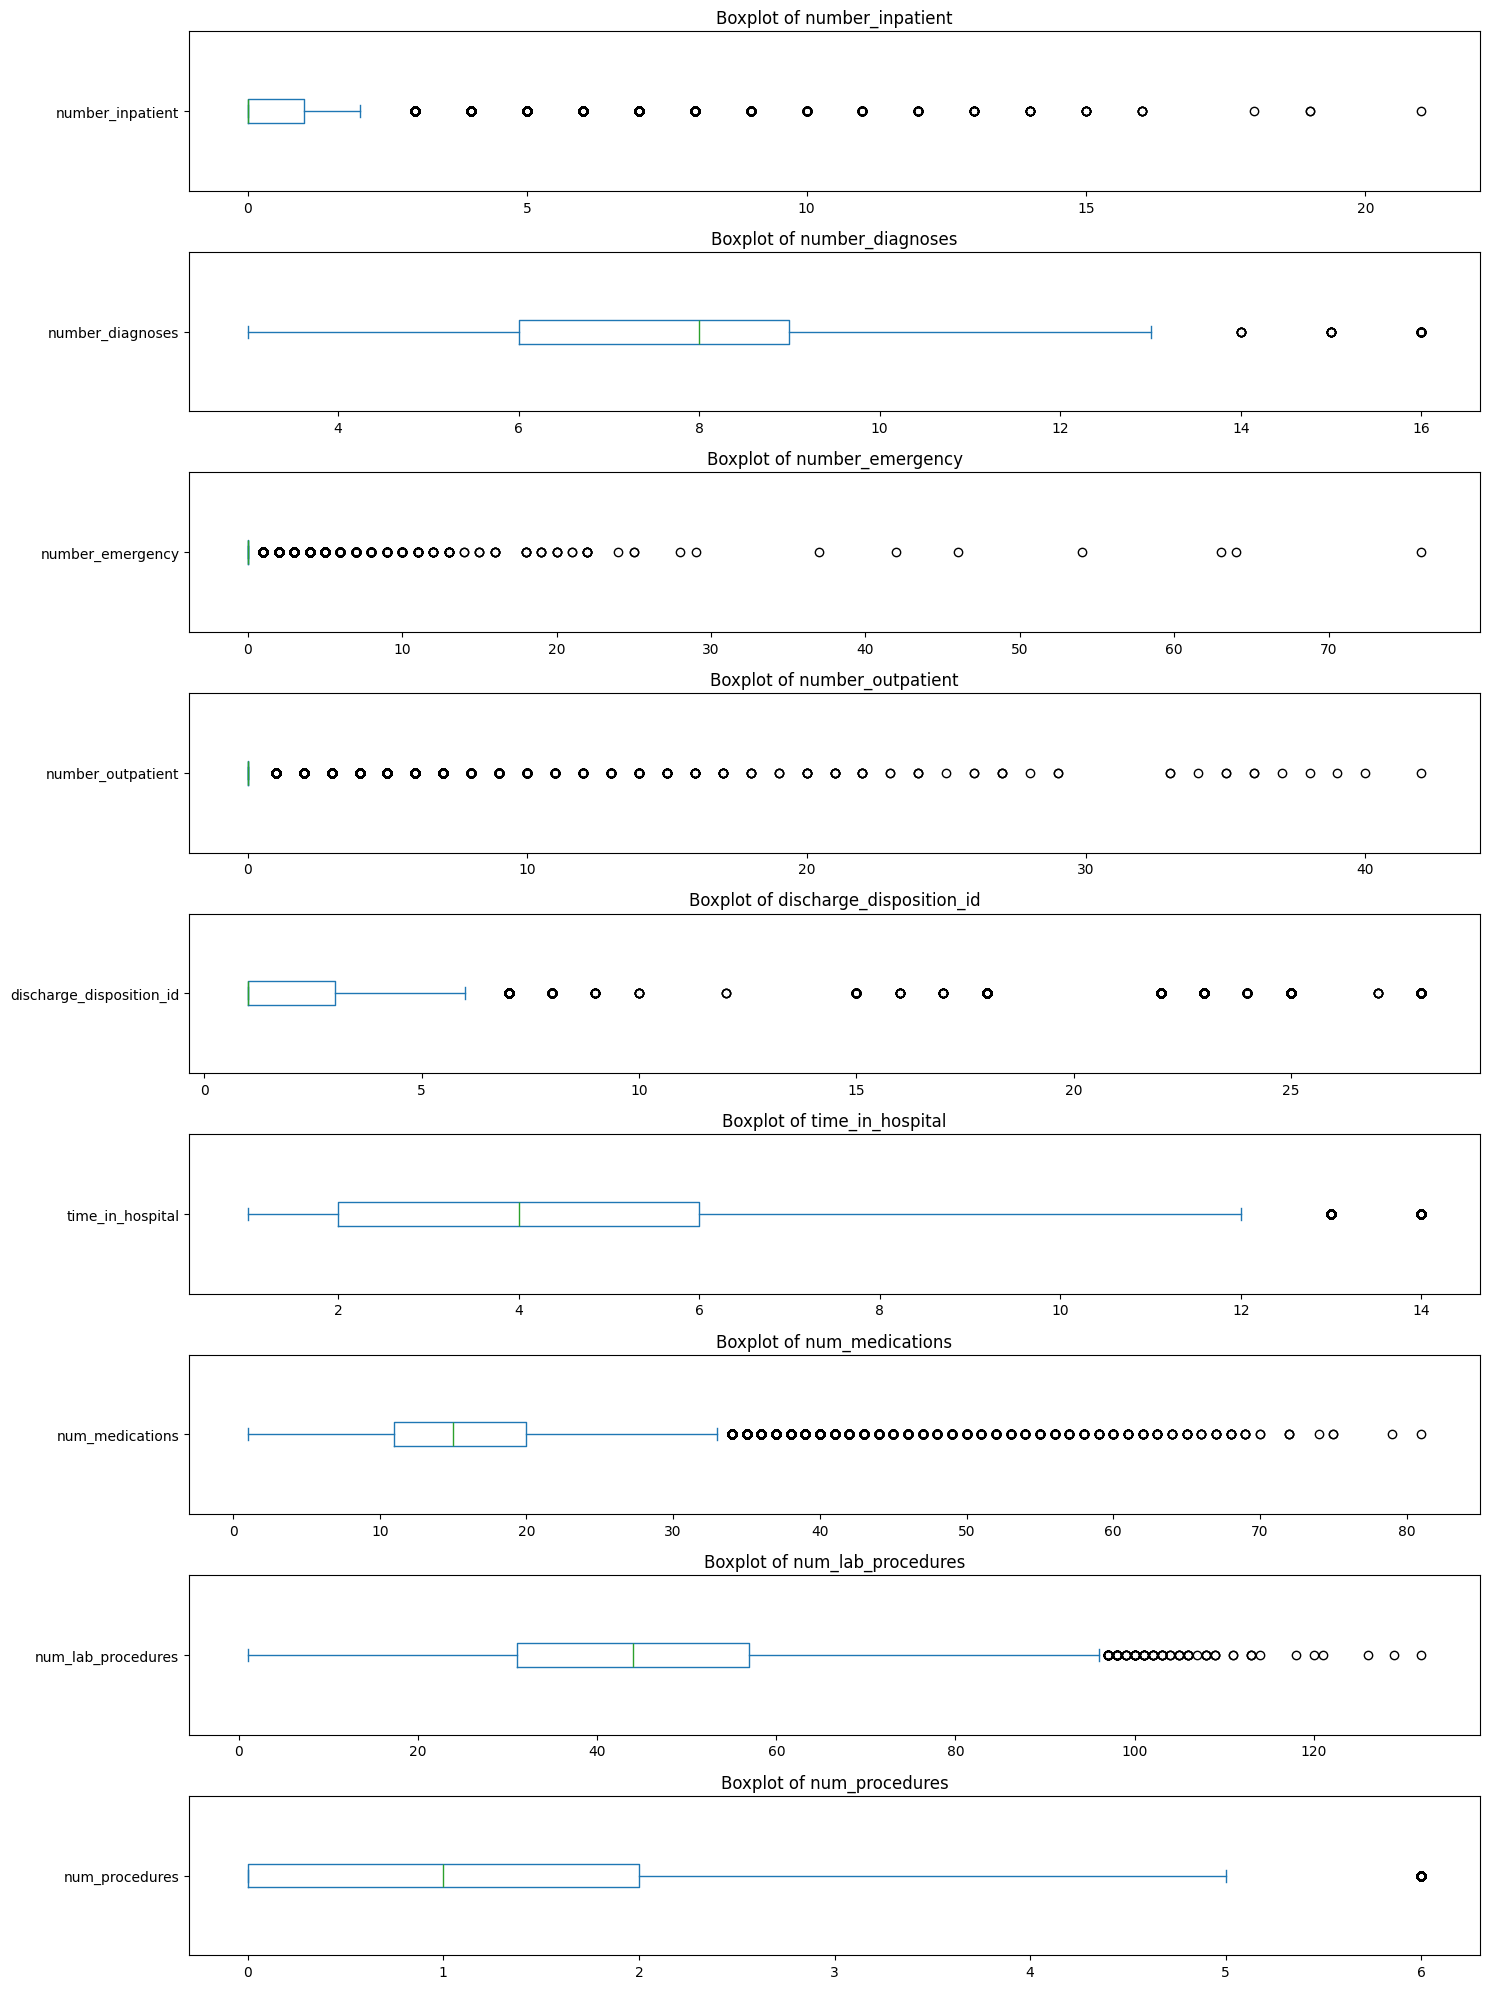

In [51]:
# List of numerical columns to analyze
numerical_features = [
    'number_inpatient', 'number_diagnoses', 'number_emergency', 'number_outpatient',
    'discharge_disposition_id', 'time_in_hospital', 'num_medications', 'num_lab_procedures',
    'num_procedures'
]

# Create boxplots for each feature
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    df_cleaned[feature].plot(kind='box', vert=False)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

## Binning Emergency and Outpatient Visits  
### Bin 'number_emergency' and 'number_outpatient' columns into categories for a more categorical representation of visit frequency.

Distribution of number_emergency_bins:
number_emergency_bins
None               86825
Low                 7409
Moderate            1968
Moderately High     1066
High                 433
Very High            121
Name: count, dtype: int64

Distribution of number_outpatient_bins:
number_outpatient_bins
None               81600
Low                 8280
Moderate            3480
Moderately High     3053
High                1132
Very High            277
Name: count, dtype: int64


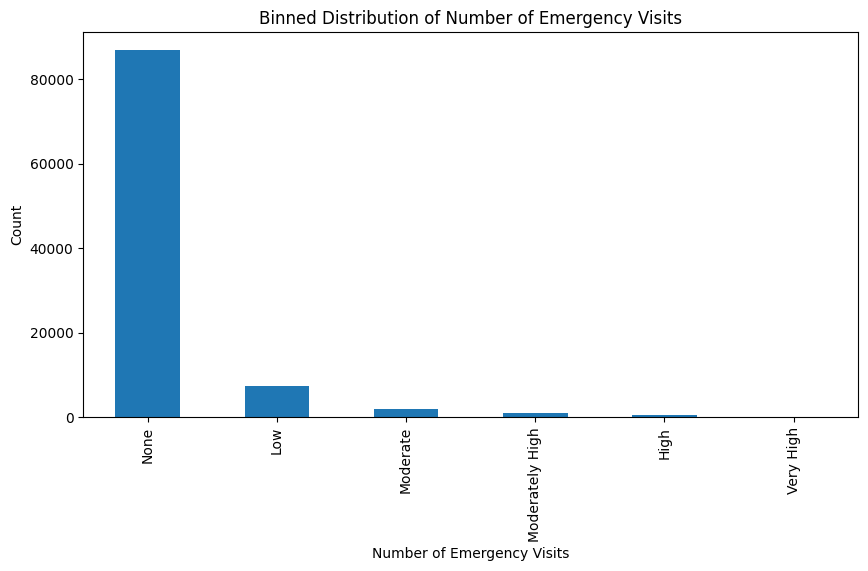

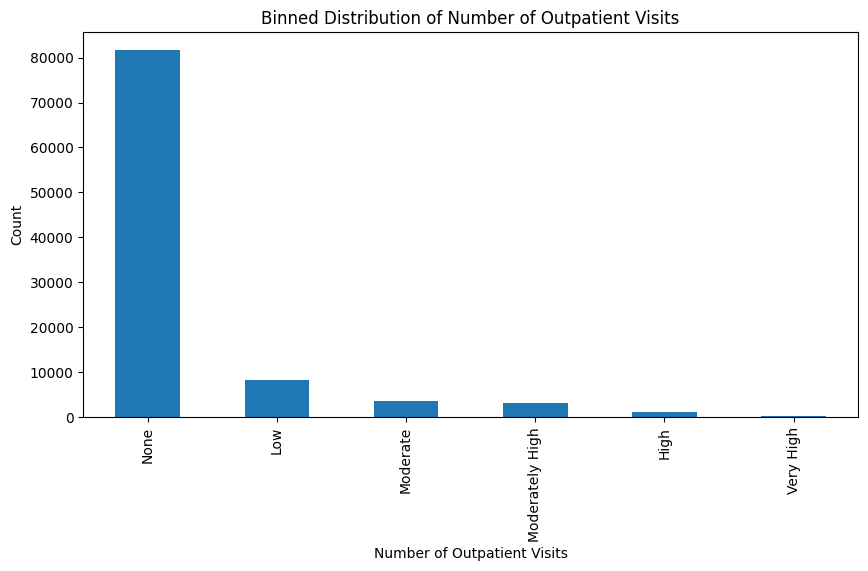

In [52]:
# Define custom bins and labels based on the distribution
bins = [-1, 0, 1, 2, 4, 9, np.inf]  # `-1` to include 0 in the first bin
labels = ['None', 'Low', 'Moderate', 'Moderately High', 'High', 'Very High']

# Apply binning to 'number_emergency' and 'number_outpatient'
df_cleaned['number_emergency_bins'] = pd.cut(df_cleaned['number_emergency'], bins=bins, labels=labels)
df_cleaned['number_outpatient_bins'] = pd.cut(df_cleaned['number_outpatient'], bins=bins, labels=labels)

df_cleaned = df_cleaned.drop(columns=['number_emergency', 'number_outpatient'])

# Display the distribution of binned values to confirm
print("Distribution of number_emergency_bins:")
print(df_cleaned['number_emergency_bins'].value_counts())

print("\nDistribution of number_outpatient_bins:")
print(df_cleaned['number_outpatient_bins'].value_counts())


plt.figure(figsize=(10, 5))
df_cleaned['number_emergency_bins'].value_counts().plot(kind='bar', title='Binned Distribution of Number of Emergency Visits')
plt.xlabel('Number of Emergency Visits')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
df_cleaned['number_outpatient_bins'].value_counts().plot(kind='bar', title='Binned Distribution of Number of Outpatient Visits')
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Count')
plt.show()

## Grouping Discharge Dispositions  
### Create a new categorical grouping for 'discharge_disposition_id' to simplify categories and reduce dimensionality.

In [53]:
# Define a mapping for the new discharge disposition categories
discharge_disposition_mapping = {
    1: "Home Discharge",
    2: "Transfer to Care Facility", 3: "Transfer to Care Facility",
    4: "Transfer to Care Facility", 5: "Transfer to Care Facility",
    6: "Transfer to Care Facility", 8: "Transfer to Care Facility",
    7: "Left AMA",
    11: "Hospice/Expired", 13: "Hospice/Expired", 14: "Hospice/Expired",
    19: "Hospice/Expired", 20: "Hospice/Expired", 21: "Hospice/Expired",
    9: "Other Transfers", 10: "Other Transfers", 12: "Other Transfers",
    15: "Other Transfers", 16: "Other Transfers", 17: "Other Transfers",
    22: "Other Transfers", 23: "Other Transfers",
    18: "Other/Uncommon", 24: "Other/Uncommon", 25: "Other/Uncommon",
    26: "Other/Uncommon", 27: "Other/Uncommon", 28: "Other/Uncommon",
    29: "Other/Uncommon", 30: "Other/Uncommon"
}

# Apply the mapping to create a new column
df_cleaned['discharge_disposition_grouped'] = df_cleaned['discharge_disposition_id'].map(discharge_disposition_mapping)

# Verify the distribution of the new grouped categories
print("Distribution of discharge disposition groups:")
print(df_cleaned['discharge_disposition_grouped'].value_counts())

# Optional: Drop the original 'discharge_disposition_id' column if it's no longer needed
df_cleaned = df_cleaned.drop(columns=['discharge_disposition_id'])
df_cleaned.shape

Distribution of discharge disposition groups:
discharge_disposition_grouped
Home Discharge               59003
Transfer to Care Facility    30921
Other/Uncommon                4789
Other Transfers               2505
Left AMA                       604
Name: count, dtype: int64


(97822, 24)

## Distribution of Discharge Disposition Groups  
### Plot the distribution of the new discharge disposition groups to visualize how patients are categorized post-discharge.

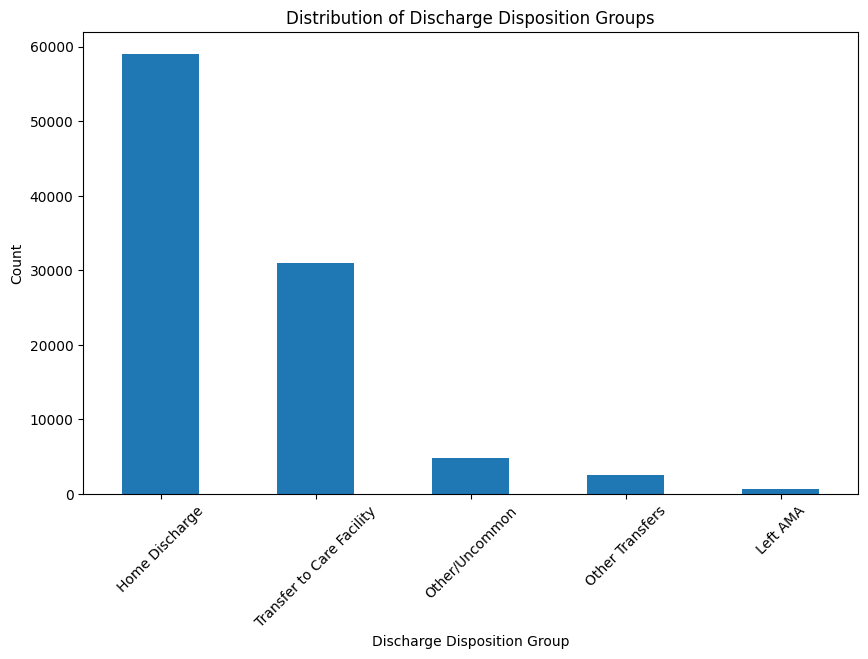

In [54]:
# Plot a histogram for the grouped discharge disposition categories
plt.figure(figsize=(10, 6))
df_cleaned['discharge_disposition_grouped'].value_counts().plot(kind='bar')
plt.title("Distribution of Discharge Disposition Groups")
plt.xlabel("Discharge Disposition Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Binning Inpatient Visits  
### Bin the 'number_inpatient' column into categories for better interpretability and drop the original column if unneeded.

In [55]:
# Define bins and labels
bins = [-1, 0, 2, 5, np.inf]  # `-1` to include 0 in the first bin
labels = ['None', 'Low', 'Moderate', 'High']

# Apply binning to 'number_inpatient'
df_cleaned['number_inpatient_binned'] = pd.cut(df_cleaned['number_inpatient'], bins=bins, labels=labels)

# Verify the distribution of the new binned column
print("Distribution of number_inpatient_binned:")
print(df_cleaned['number_inpatient_binned'].value_counts())

# Optional: Drop the original 'number_inpatient' column if it's no longer needed
df_cleaned = df_cleaned.drop(columns=['number_inpatient'])
df_cleaned.shape

Distribution of number_inpatient_binned:
number_inpatient_binned
None        64995
Low         26074
Moderate     5592
High         1161
Name: count, dtype: int64


(97822, 24)

## Binned Number of Inpatient Visits  
### Display the distribution of binned inpatient visits to see visit frequency across categories.

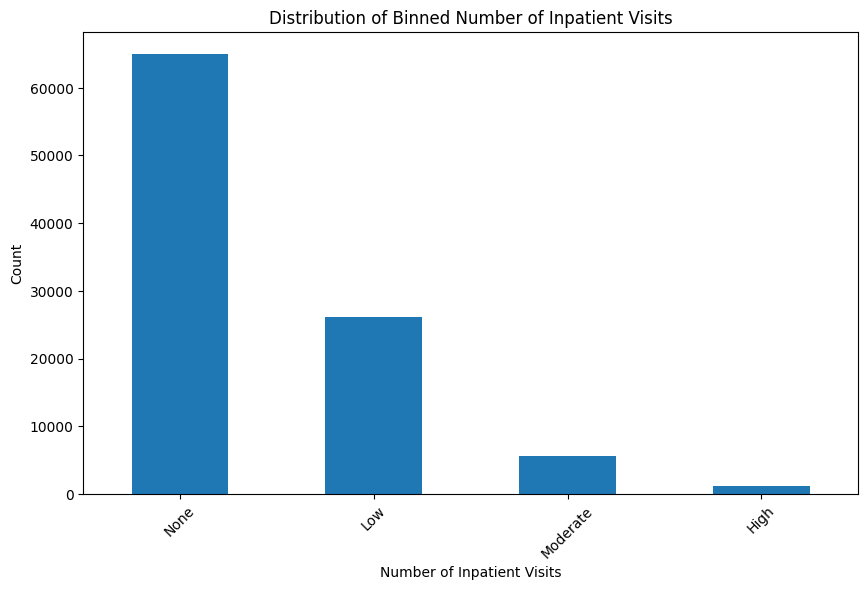

In [56]:
# Plot a histogram for the binned 'number_inpatient' categories
plt.figure(figsize=(10, 6))
df_cleaned['number_inpatient_binned'].value_counts().plot(kind='bar')
plt.title("Distribution of Binned Number of Inpatient Visits")
plt.xlabel("Number of Inpatient Visits")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Numeric Feature Outlier Detection  
### Identify and summarize outliers in numeric features using the IQR method for a robust view of data quality.

In [57]:
# Identify numeric columns in the dataset
numeric_features = df_cleaned.select_dtypes(include='number').columns.tolist()
print("Numeric features in the dataset:", numeric_features)

# Initialize a dictionary to store outlier information for each numeric feature
outlier_info = {}

for feature in numeric_features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df_cleaned[(df_cleaned[feature] < lower_bound) | (df_cleaned[feature] > upper_bound)]

    # Calculate the count and percentage of outliers
    outlier_count = outliers.shape[0]
    total_count = df_cleaned.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100

    # Store the results in the dictionary
    outlier_info[feature] = {
        "Outlier Count": outlier_count,
        "Outlier Percentage": outlier_percentage
    }

# Convert the dictionary to a DataFrame for easier interpretation
outlier_df = pd.DataFrame(outlier_info).T
print("Outlier Information for Numeric Features:")
print(outlier_df)


Numeric features in the dataset: ['admission_type_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'readmitted', 'age_decade']
Outlier Information for Numeric Features:
                     Outlier Count  Outlier Percentage
admission_type_id            333.0            0.340414
admission_source_id         6645.0            6.792950
time_in_hospital            2141.0            2.188669
num_lab_procedures           120.0            0.122672
num_procedures              4787.0            4.893582
num_medications             3253.0            3.325428
number_diagnoses              58.0            0.059291
readmitted                 11207.0           11.456523
age_decade                   532.0            0.543845


## Grouping Admission Source IDs  
### Map admission source IDs into broader categories for simplified analysis and check the distribution of these groups.

In [58]:
# Define the mapping for admission_source_id based on the grouping strategy
admission_source_mapping = {
    1: "Physician Referral",
    7: "Emergency Room",
    2: "Other Health Facility Transfers",
    3: "Other Health Facility Transfers",
    4: "Other Health Facility Transfers",
    5: "Other Health Facility Transfers",
    6: "Other Health Facility Transfers",
    9: "Unknown/Not Available",
    15: "Unknown/Not Available",
    17: "Unknown/Not Available",
    20: "Unknown/Not Available",
    21: "Unknown/Not Available",
    8: "Other",
    10: "Other",
    11: "Other",
    12: "Other",
    13: "Other",
    14: "Other",
    18: "Other",
    19: "Other",
    22: "Other",
    23: "Other",
    24: "Other",
    25: "Other",
    26: "Other"
}

# Apply the mapping to create a new column with grouped categories
df_cleaned['admission_source_grouped'] = df_cleaned['admission_source_id'].map(admission_source_mapping)

# Verify the distribution of the new grouped column
print("Distribution of admission source groups:")
print(df_cleaned['admission_source_grouped'].value_counts())

# Optional: Drop the original 'admission_source_id' column if it's no longer needed
df_cleaned = df_cleaned.drop(columns=['admission_source_id'])
df_cleaned.shape

Distribution of admission source groups:
admission_source_grouped
Emergency Room                     55155
Physician Referral                 28639
Other Health Facility Transfers     7244
Unknown/Not Available               6743
Other                                 41
Name: count, dtype: int64


(97822, 24)

## Winsorizing Outliers  
### Apply winsorization to 'num_procedures' and 'num_medications' to cap extreme values at the 95th percentile and reevaluate outliers.

In [59]:
# Identify numeric columns in the dataset
numeric_features = df_cleaned.select_dtypes(include='number').columns.tolist()
print("Numeric features in the dataset:", numeric_features)

# Initialize a dictionary to store outlier information for each numeric feature
outlier_info = {}

for feature in numeric_features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df_cleaned[(df_cleaned[feature] < lower_bound) | (df_cleaned[feature] > upper_bound)]

    # Calculate the count and percentage of outliers
    outlier_count = outliers.shape[0]
    total_count = df_cleaned.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100

    # Store the results in the dictionary
    outlier_info[feature] = {
        "Outlier Count": outlier_count,
        "Outlier Percentage": outlier_percentage
    }

# Convert the dictionary to a DataFrame for easier interpretation
outlier_df = pd.DataFrame(outlier_info).T
print("Outlier Information for Numeric Features:")
print(outlier_df)
df_cleaned.shape

Numeric features in the dataset: ['admission_type_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'readmitted', 'age_decade']
Outlier Information for Numeric Features:
                    Outlier Count  Outlier Percentage
admission_type_id           333.0            0.340414
time_in_hospital           2141.0            2.188669
num_lab_procedures          120.0            0.122672
num_procedures             4787.0            4.893582
num_medications            3253.0            3.325428
number_diagnoses             58.0            0.059291
readmitted                11207.0           11.456523
age_decade                  532.0            0.543845


(97822, 24)

## Time in Hospital Box Plot  
### Display a boxplot of 'time_in_hospital' to visually assess the distribution and identify any remaining outliers.

In [60]:

# Winsorize num_procedures at the 95th percentile
num_procedures_cap = df_cleaned['num_procedures'].quantile(0.95)
df_cleaned['num_procedures'] = np.where(df_cleaned['num_procedures'] > num_procedures_cap, num_procedures_cap, df_cleaned['num_procedures'])

# Winsorize num_medications at the 95th percentile
num_medications_cap = df_cleaned['num_medications'].quantile(0.95)
df_cleaned['num_medications'] = np.where(df_cleaned['num_medications'] > num_medications_cap, num_medications_cap, df_cleaned['num_medications'])

# Re-evaluate outliers after handling
outlier_info_post = {}

for feature in ['num_procedures', 'num_medications']:
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[feature] < lower_bound) | (df_cleaned[feature] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = df_cleaned.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100

    outlier_info_post[feature] = {
        "Outlier Count": outlier_count,
        "Outlier Percentage": outlier_percentage
    }

# Display the new outlier information
outlier_df_post = pd.DataFrame(outlier_info_post).T
print("Outlier Information After Handling:")
print(outlier_df_post)
df_cleaned.shape

Outlier Information After Handling:
                 Outlier Count  Outlier Percentage
num_procedures             0.0                 0.0
num_medications            0.0                 0.0


(97822, 24)

## Time in Hospital Box Plot  
### Display a boxplot of 'time_in_hospital' to visually assess the distribution and identify any remaining outliers.

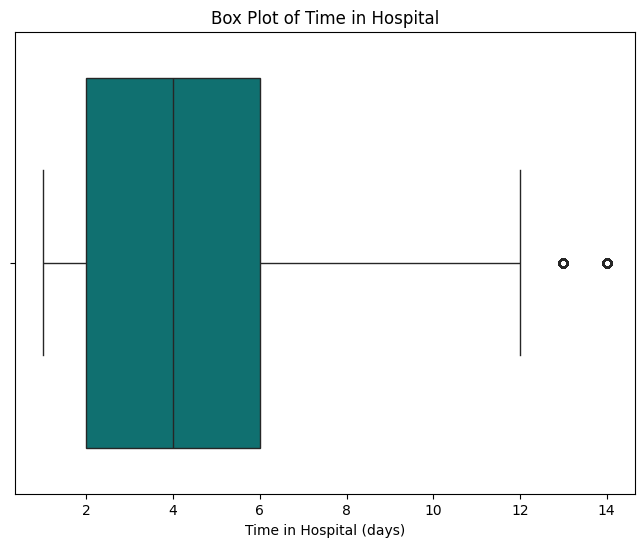

In [61]:
# Set the figure size for better readability
plt.figure(figsize=(8, 6))

# Plot a boxplot for 'time_in_hospital'
sns.boxplot(x=df_cleaned['time_in_hospital'], color="teal")

# Set the title and labels for clarity
plt.title("Box Plot of Time in Hospital")
plt.xlabel("Time in Hospital (days)")

# Show the plot
plt.show()

## Dataset Info and Null Check  
### Display dataset structure and confirm that there are no remaining missing values.

In [62]:
df_cleaned.info()
df_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 97822 entries, 1 to 101765
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   race                           97822 non-null  object  
 1   gender                         97822 non-null  object  
 2   admission_type_id              97822 non-null  int64   
 3   time_in_hospital               97822 non-null  int64   
 4   num_lab_procedures             97822 non-null  int64   
 5   num_procedures                 97822 non-null  float64 
 6   num_medications                97822 non-null  float64 
 7   diag_1                         97822 non-null  object  
 8   diag_2                         97822 non-null  object  
 9   diag_3                         97822 non-null  object  
 10  number_diagnoses               97822 non-null  int64   
 11  metformin                      97822 non-null  object  
 12  glipizide                      97822

race                             0
gender                           0
admission_type_id                0
time_in_hospital                 0
num_lab_procedures               0
num_procedures                   0
num_medications                  0
diag_1                           0
diag_2                           0
diag_3                           0
number_diagnoses                 0
metformin                        0
glipizide                        0
glyburide                        0
insulin                          0
change                           0
diabetesMed                      0
readmitted                       0
age_decade                       0
number_emergency_bins            0
number_outpatient_bins           0
discharge_disposition_grouped    0
number_inpatient_binned          0
admission_source_grouped         0
dtype: int64

## Unique Value Count per Feature  
### Count unique values in each column to evaluate categorical diversity and verify data consistency.

In [63]:
# Count unique values for each column in the dataset
unique_counts = df_cleaned.nunique()

# Display the unique counts
for column, count in unique_counts.items():
    print(f"Feature: {column} - Unique Values: {count}")

Feature: race - Unique Values: 5
Feature: gender - Unique Values: 2
Feature: admission_type_id - Unique Values: 8
Feature: time_in_hospital - Unique Values: 14
Feature: num_lab_procedures - Unique Values: 118
Feature: num_procedures - Unique Values: 6
Feature: num_medications - Unique Values: 31
Feature: diag_1 - Unique Values: 713
Feature: diag_2 - Unique Values: 742
Feature: diag_3 - Unique Values: 786
Feature: number_diagnoses - Unique Values: 14
Feature: metformin - Unique Values: 2
Feature: glipizide - Unique Values: 2
Feature: glyburide - Unique Values: 2
Feature: insulin - Unique Values: 2
Feature: change - Unique Values: 2
Feature: diabetesMed - Unique Values: 2
Feature: readmitted - Unique Values: 2
Feature: age_decade - Unique Values: 10
Feature: number_emergency_bins - Unique Values: 6
Feature: number_outpatient_bins - Unique Values: 6
Feature: discharge_disposition_grouped - Unique Values: 5
Feature: number_inpatient_binned - Unique Values: 4
Feature: admission_source_group

## Dataset Summary  
### Display a statistical summary of numerical features to verify data ranges and distributions.

In [64]:
df_cleaned.describe()

,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted,age_decade
count,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000
mean,2.029073,4.403938,42.983848,1.295966,15.718243,7.477531,0.114565,7.105835
std,1.445886,2.974618,19.627335,1.583706,7.004121,1.846022,0.318498,1.558525
min,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
25%,1.000000,2.000000,31.000000,0.000000,11.000000,6.000000,0.000000,6.000000
50%,1.000000,4.000000,44.000000,1.000000,15.000000,8.000000,0.000000,7.000000
75%,3.000000,6.000000,57.000000,2.000000,20.000000,9.000000,0.000000,8.000000
max,8.000000,14.000000,132.000000,5.000000,31.000000,16.000000,1.000000,10.000000


## Binary Encoding of Categorical Features  
### Encode binary categorical features (e.g., 'gender' and medications) into numeric format (0 or 1).

In [65]:
# List of features with exactly 2 unique values (based on the unique counts you shared)
binary_features = ['gender', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change', 'diabetesMed']

# Perform binary encoding by mapping categories to 0 and 1
for feature in binary_features:
    df_cleaned[feature] = df_cleaned[feature].map({df_cleaned[feature].unique()[0]: 0, df_cleaned[feature].unique()[1]: 1})

# Display the result to check the encoding
df_cleaned[binary_features].head()

,gender,metformin,glipizide,glyburide,insulin,change,diabetesMed
1,0,0,0,0,0,0,0
2,0,0,1,0,1,1,0
3,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0
5,1,0,0,0,0,1,0


In [66]:
df_cleaned.head(10)

,race,gender,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,...,insulin,change,diabetesMed,readmitted,age_decade,number_emergency_bins,number_outpatient_bins,discharge_disposition_grouped,number_inpatient_binned,admission_source_grouped
1,Caucasian,0,1,3,59,0.0,18.0,276,250.01,255,...,0,0,0,0,2,None,None,Home Discharge,None,Emergency Room
2,AfricanAmerican,0,1,2,11,5.0,13.0,648,250,V27,...,1,1,0,0,3,None,Moderate,Home Discharge,Low,Emergency Room
3,Caucasian,1,1,2,44,1.0,16.0,8,250.43,403,...,0,0,0,0,4,None,None,Home Discharge,None,Emergency Room
4,Caucasian,1,1,1,51,0.0,8.0,197,157,250,...,0,0,0,0,5,None,None,Home Discharge,None,Emergency Room
5,Caucasian,1,2,3,31,5.0,16.0,414,411,250,...,0,1,0,0,6,None,None,Home Discharge,None,Other Health Facility Transfers
6,Caucasian,1,3,4,70,1.0,21.0,414,411,V45,...,0,0,0,0,7,None,None,Home Discharge,None,Other Health Facility Transfers
7,Caucasian,1,1,5,73,0.0,12.0,428,492,250,...,1,1,0,0,8,None,None,Home Discharge,None,Emergency Room
8,Caucasian,0,2,13,68,2.0,28.0,398,427,38,...,0,0,0,0,9,None,None,Home Discharge,None,Other Health Facility Transfers
9,Caucasian,0,3,12,33,3.0,18.0,434,198,486,...,0,0,0,0,10,None,None,Transfer to Care Facility,None,Other Health Facility Transfers
10,AfricanAmerican,0,1,9,47,2.0,17.0,250.7,403,996,...,0,1,0,0,5,None,None,Home Discharge,None,Emergency Room


In [67]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97822 entries, 1 to 101765
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   race                           97822 non-null  object  
 1   gender                         97822 non-null  int64   
 2   admission_type_id              97822 non-null  int64   
 3   time_in_hospital               97822 non-null  int64   
 4   num_lab_procedures             97822 non-null  int64   
 5   num_procedures                 97822 non-null  float64 
 6   num_medications                97822 non-null  float64 
 7   diag_1                         97822 non-null  object  
 8   diag_2                         97822 non-null  object  
 9   diag_3                         97822 non-null  object  
 10  number_diagnoses               97822 non-null  int64   
 11  metformin                      97822 non-null  int64   
 12  glipizide                      97822

## One-Hot Encoding of Multicategorical Features  
### Apply one-hot encoding to multicategorical features for compatibility with machine learning models.

In [68]:
# List of features to apply one-hot encoding (based on your unique values list)
one_hot_features = ['race', 'admission_type_id', 'discharge_disposition_grouped', 'admission_source_grouped', 'number_emergency_bins', 'number_outpatient_bins', 'number_inpatient_binned']

# Apply one-hot encoding using pandas get_dummies
df_cleaned = pd.get_dummies(df_cleaned, columns=one_hot_features, dtype=int, drop_first=True)

# Display the result to check the one-hot encoding
df_cleaned.head(10)

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,metformin,...,number_emergency_bins_High,number_emergency_bins_Very High,number_outpatient_bins_Low,number_outpatient_bins_Moderate,number_outpatient_bins_Moderately High,number_outpatient_bins_High,number_outpatient_bins_Very High,number_inpatient_binned_Low,number_inpatient_binned_Moderate,number_inpatient_binned_High
1,0,3,59,0.0,18.0,276,250.01,255,9,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,11,5.0,13.0,648,250,V27,6,0,...,0,0,0,1,0,0,0,1,0,0
3,1,2,44,1.0,16.0,8,250.43,403,7,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,51,0.0,8.0,197,157,250,5,0,...,0,0,0,0,0,0,0,0,0,0
5,1,3,31,5.0,16.0,414,411,250,9,0,...,0,0,0,0,0,0,0,0,0,0
6,1,4,70,1.0,21.0,414,411,V45,7,1,...,0,0,0,0,0,0,0,0,0,0
7,1,5,73,0.0,12.0,428,492,250,8,0,...,0,0,0,0,0,0,0,0,0,0
8,0,13,68,2.0,28.0,398,427,38,8,0,...,0,0,0,0,0,0,0,0,0,0
9,0,12,33,3.0,18.0,434,198,486,8,0,...,0,0,0,0,0,0,0,0,0,0
10,0,9,47,2.0,17.0,250.7,403,996,9,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97822 entries, 1 to 101765
Data columns (total 49 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   gender                                                    97822 non-null  int64  
 1   time_in_hospital                                          97822 non-null  int64  
 2   num_lab_procedures                                        97822 non-null  int64  
 3   num_procedures                                            97822 non-null  float64
 4   num_medications                                           97822 non-null  float64
 5   diag_1                                                    97822 non-null  object 
 6   diag_2                                                    97822 non-null  object 
 7   diag_3                                                    97822 non-null  object 
 8   number_diagnoses    

## Diagnosis Column Investigation  
### Display value counts for diagnosis columns ('diag_1', 'diag_2', 'diag_3') to understand their distribution and potential grouping.

In [70]:
# 1. Investigating 'diag 1', 'diag 2', and 'diag 3' features

# Value counts for each 'diag' column
print("Value counts for diag 1:")
print(df_cleaned['diag_1'].value_counts())

print("\nValue counts for diag 2:")
print(df_cleaned['diag_2'].value_counts())

print("\nValue counts for diag 3:")
print(df_cleaned['diag_3'].value_counts())

# You can categorize them into broader categories if they represent specific medical diagnoses.
# For example, if they are ICD codes, you can group them by categories like cardiovascular, endocrine, etc.

# 2. Investigating the dependent variable 'readmitted'

# Check the distribution of the 'readmitted' column to see if it is balanced
print("\nValue counts for readmitted:")
print(df_cleaned['readmitted'].value_counts())

Value counts for diag 1:
diag_1
428    6654
414    6514
786    3976
410    3444
486    3371
       ... 
314       1
684       1
640       1
817       1
V51       1
Name: count, Length: 713, dtype: int64

Value counts for diag 2:
diag_2
276     6459
428     6454
250     5564
427     4878
401     3691
        ... 
V13        1
E850       1
800        1
164        1
927        1
Name: count, Length: 742, dtype: int64

Value counts for diag 3:
diag_3
250     11444
401      8232
276      4950
428      4407
427      3779
        ...  
E826        1
603         1
684         1
657         1
971         1
Name: count, Length: 786, dtype: int64

Value counts for readmitted:
readmitted
0    86615
1    11207
Name: count, dtype: int64


## Categorizing Diagnosis Codes  
### Map diagnosis codes to broader ICD-9 categories for a more interpretable feature set.

In [71]:
def categorize_icd9(code):
    # Convert code to a string to handle all cases uniformly
    code_str = str(code).strip()
    
    if code_str.startswith('E'):
        return 'External Causes'
    elif code_str.startswith('V'):
        return 'Health Services Factors'
    elif code_str.isnumeric():  # Check if it's a numeric code
        code = int(code_str)  # Convert to integer
        if 1 <= code <= 139:
            return 'Infectious Diseases'
        elif 140 <= code <= 239:
            return 'Neoplasms'
        elif 240 <= code <= 279:
            return 'Endocrine/Metabolic'
        elif 280 <= code <= 289:
            return 'Blood Diseases'
        elif 290 <= code <= 319:
            return 'Mental Disorders'
        elif 320 <= code <= 389:
            return 'Nervous System'
        elif 390 <= code <= 459:
            return 'Circulatory System'
        elif 460 <= code <= 519:
            return 'Respiratory System'
        elif 520 <= code <= 579:
            return 'Digestive System'
        elif 580 <= code <= 629:
            return 'Genitourinary System'
        elif 630 <= code <= 679:
            return 'Pregnancy/Childbirth'
        elif 680 <= code <= 709:
            return 'Skin Diseases'
        elif 710 <= code <= 739:
            return 'Musculoskeletal'
        elif 740 <= code <= 759:
            return 'Congenital Anomalies'
        elif 760 <= code <= 779:
            return 'Perinatal Conditions'
        elif 780 <= code <= 799:
            return 'Symptoms'
        elif 800 <= code <= 999:
            return 'Injury/Poisoning'
        else:
            return 'Other'
    else:
        return 'Unknown'  # Non-numeric or undefined values

# Apply categorization function to the 'diag' columns
df_cleaned['diag_1_category'] = df_cleaned['diag_1'].apply(categorize_icd9)
df_cleaned['diag_2_category'] = df_cleaned['diag_2'].apply(categorize_icd9)
df_cleaned['diag_3_category'] = df_cleaned['diag_3'].apply(categorize_icd9)

# Reset the index to ensure it's consecutive and drop the old index
df_cleaned = df_cleaned.reset_index(drop=True)


df_cleaned.shape
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97822 entries, 0 to 97821
Data columns (total 52 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   gender                                                    97822 non-null  int64  
 1   time_in_hospital                                          97822 non-null  int64  
 2   num_lab_procedures                                        97822 non-null  int64  
 3   num_procedures                                            97822 non-null  float64
 4   num_medications                                           97822 non-null  float64
 5   diag_1                                                    97822 non-null  object 
 6   diag_2                                                    97822 non-null  object 
 7   diag_3                                                    97822 non-null  object 
 8   number_diagnoses

## One-Hot Encoding for Diagnosis Categories  
### Perform one-hot encoding on the categorized 'diag' columns and drop the original diagnosis columns to avoid redundancy.

In [72]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap if desired

# Fit and transform the encoder, then convert the sparse output to a dense array
diag_encoded = encoder.fit_transform(df_cleaned[['diag_1_category', 'diag_2_category', 'diag_3_category']]).toarray()

# Convert the encoded data to a DataFrame with named columns
diag_encoded_df = pd.DataFrame(diag_encoded, columns=encoder.get_feature_names_out(['diag_1_category', 'diag_2_category', 'diag_3_category']))

# Concatenate the encoded columns back to the main dataframe
df_cleaned = pd.concat([df_cleaned, diag_encoded_df], axis=1)

# Drop the original 'diag' columns and intermediate category columns if they are no longer needed
df_cleaned.drop(['diag_1', 'diag_2', 'diag_3', 'diag_1_category', 'diag_2_category', 'diag_3_category'], axis=1, inplace=True)

# Display info to check if everything is as expected
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97822 entries, 0 to 97821
Data columns (total 100 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   gender                                                    97822 non-null  int64  
 1   time_in_hospital                                          97822 non-null  int64  
 2   num_lab_procedures                                        97822 non-null  int64  
 3   num_procedures                                            97822 non-null  float64
 4   num_medications                                           97822 non-null  float64
 5   number_diagnoses                                          97822 non-null  int64  
 6   metformin                                                 97822 non-null  int64  
 7   glipizide                                                 97822 non-null  int64  
 8   glyburide      

In [73]:
df_cleaned.head(5)

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,glipizide,glyburide,insulin,...,diag_3_category_Injury/Poisoning,diag_3_category_Mental Disorders,diag_3_category_Musculoskeletal,diag_3_category_Neoplasms,diag_3_category_Nervous System,diag_3_category_Pregnancy/Childbirth,diag_3_category_Respiratory System,diag_3_category_Skin Diseases,diag_3_category_Symptoms,diag_3_category_Unknown
0,0,3,59,0.0,18.0,9,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,11,5.0,13.0,6,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,44,1.0,16.0,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,51,0.0,8.0,5,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,31,5.0,16.0,9,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df_cleaned.describe()

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,glipizide,glyburide,insulin,...,diag_3_category_Injury/Poisoning,diag_3_category_Mental Disorders,diag_3_category_Musculoskeletal,diag_3_category_Neoplasms,diag_3_category_Nervous System,diag_3_category_Pregnancy/Childbirth,diag_3_category_Respiratory System,diag_3_category_Skin Diseases,diag_3_category_Symptoms,diag_3_category_Unknown
count,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,...,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000,97822.000000
mean,0.461573,4.403938,42.983848,1.295966,15.718243,7.477531,0.199924,0.126822,0.106305,0.468177,...,0.019362,0.031700,0.019392,0.016959,0.017460,0.003159,0.065629,0.024790,0.045072,0.056306
std,0.498524,2.974618,19.627335,1.583706,7.004121,1.846022,0.399945,0.332775,0.308230,0.498989,...,0.137793,0.175202,0.137900,0.129120,0.130979,0.056115,0.247634,0.155485,0.207462,0.230514
min,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,31.000000,0.000000,11.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,44.000000,1.000000,15.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,57.000000,2.000000,20.000000,9.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,14.000000,132.000000,5.000000,31.000000,16.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
df_cleaned.shape

(97822, 100)

In [76]:
df_cleaned.isnull().sum()

gender                                  0
time_in_hospital                        0
num_lab_procedures                      0
num_procedures                          0
num_medications                         0
                                       ..
diag_3_category_Pregnancy/Childbirth    0
diag_3_category_Respiratory System      0
diag_3_category_Skin Diseases           0
diag_3_category_Symptoms                0
diag_3_category_Unknown                 0
Length: 100, dtype: int64

## Identifying Continuous Features  
### Filter numeric columns with more than two unique values to identify continuous features for scaling.

In [77]:
# Identify numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Filter columns with more than two unique values (to exclude binary and categorical-like features)
continuous_features = [col for col in numeric_columns if df_cleaned[col].nunique() > 2]

# Display the continuous features
print("Continuous features in the dataset:", continuous_features)

Continuous features in the dataset: ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'age_decade']


## Scaling Continuous Features  
### Standardize continuous features to ensure they have a mean of 0 and a standard deviation of 1 for improved model performance.

In [78]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected continuous features
df_cleaned[continuous_features] = scaler.fit_transform(df_cleaned[continuous_features])

# Display scaled data statistics to verify
print(df_cleaned[continuous_features].describe())

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      9.782200e+04        9.782200e+04    9.782200e+04     9.782200e+04   
mean      -6.624430e-17       -1.045963e-16    5.629313e-17     2.091925e-17   
std        1.000005e+00        1.000005e+00    1.000005e+00     1.000005e+00   
min       -1.144333e+00       -2.139061e+00   -8.183166e-01    -2.101380e+00   
25%       -8.081541e-01       -6.105724e-01   -8.183166e-01    -6.736416e-01   
50%       -1.357955e-01        5.177254e-02   -1.868830e-01    -1.025463e-01   
75%        5.365631e-01        7.141175e-01    4.445507e-01     6.113228e-01   
max        3.225998e+00        4.535338e+00    2.338852e+00     2.181835e+00   

       number_diagnoses    age_decade  
count      9.782200e+04  9.782200e+04  
mean       1.069206e-16 -2.719503e-16  
std        1.000005e+00  1.000005e+00  
min       -2.425515e+00 -3.917721e+00  
25%       -8.003904e-01 -7.095431e-01  
50%        2.830259e-01 -6.790755e-02  

In [79]:
df_cleaned.shape

(97822, 100)

## Correlation Analysis  
### Calculate correlations with the target variable ('readmitted') to identify features that may impact readmission likelihood.

Correlations with target variable 'readmitted':
 readmitted                                       1.000000
number_inpatient_binned_High                     0.099582
number_inpatient_binned_Moderate                 0.092817
discharge_disposition_grouped_Other Transfers    0.066447
number_inpatient_binned_Low                      0.058787
                                                   ...   
diag_1_category_Symptoms                        -0.022129
diabetesMed                                     -0.025554
metformin                                       -0.025645
diag_3_category_Endocrine/Metabolic             -0.033111
insulin                                         -0.034983
Name: readmitted, Length: 100, dtype: float64


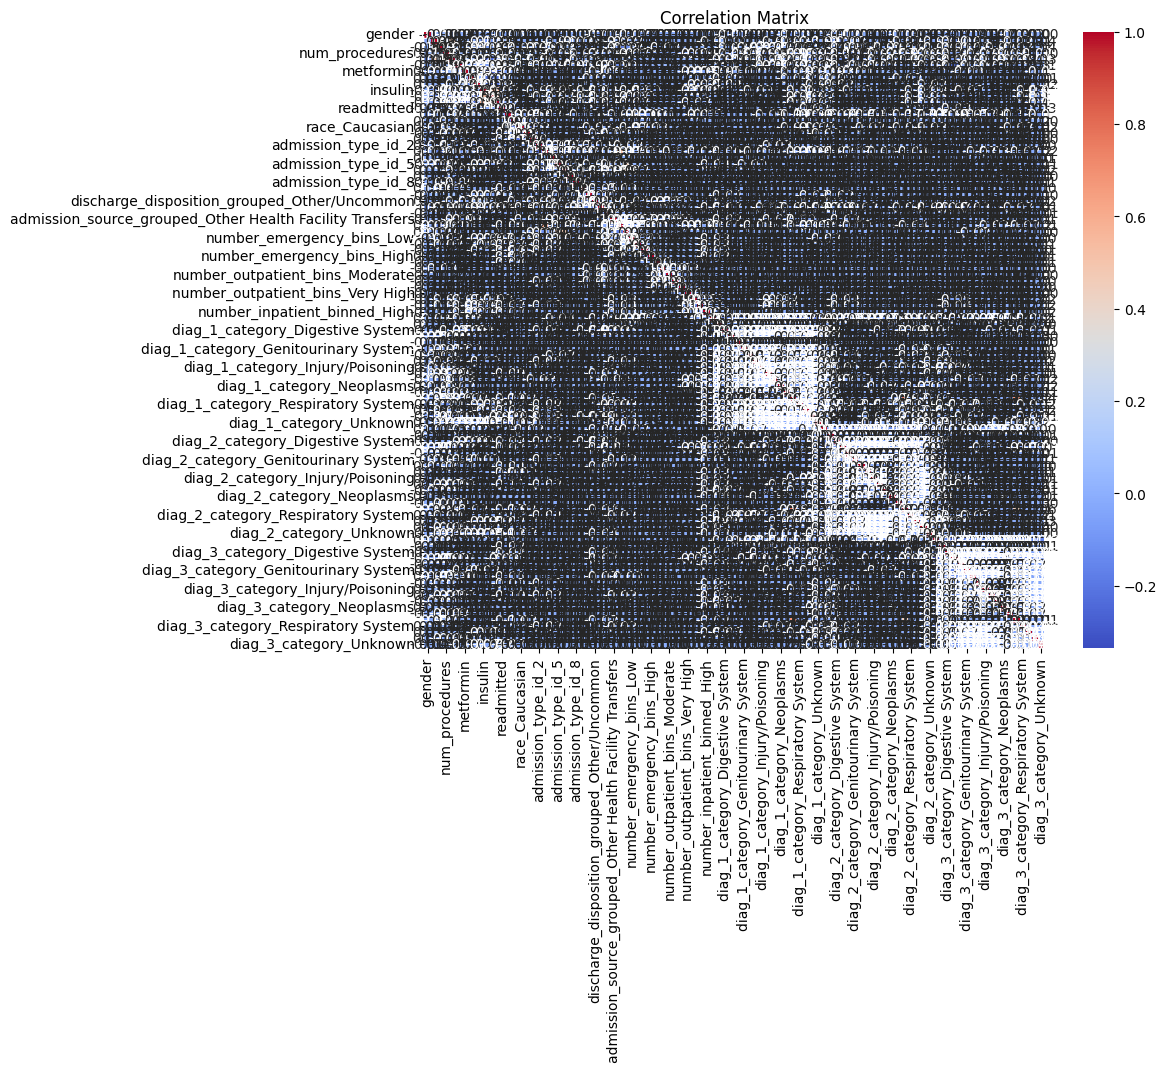

In [80]:
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Display correlations with the target variable (assuming 'readmitted' is the target)
target_correlations = corr_matrix['readmitted'].sort_values(ascending=False)
print("Correlations with target variable 'readmitted':\n", target_correlations)

# Visualize the correlation matrix if desired
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [81]:
df_cleaned.shape

(97822, 100)

## Removing Highly Correlated Features  
### Drop features with high correlations (above 0.8) to avoid redundancy and multicollinearity in the model.

In [82]:
# Define the correlation threshold
correlation_threshold = 0.8

# Calculate the correlation matrix
corr_matrix = df_cleaned.corr().abs()  # Take absolute value to consider both positive and negative correlations

# Create a set to hold the features to be dropped
to_drop = set()

# Iterate through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            # If correlation is above the threshold, mark one of the features for removal
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

# Drop the highly correlated features
df_cleaned_reduced = df_cleaned.drop(columns=to_drop)

# Display the reduced dataset and the list of dropped features
print("Features dropped due to high correlation:", to_drop)
print("Shape of the dataset after removing highly correlated features:", df_cleaned_reduced.shape)

Features dropped due to high correlation: set()
Shape of the dataset after removing highly correlated features: (97822, 100)


In [83]:
df_cleaned_reduced.isna().sum()

gender                                  0
time_in_hospital                        0
num_lab_procedures                      0
num_procedures                          0
num_medications                         0
                                       ..
diag_3_category_Pregnancy/Childbirth    0
diag_3_category_Respiratory System      0
diag_3_category_Skin Diseases           0
diag_3_category_Symptoms                0
diag_3_category_Unknown                 0
Length: 100, dtype: int64

## KBest Feature Selection  
### Select top features based on their relevance to the target variable, improving model interpretability and performance.

In [84]:
# Define X and y
X = df_cleaned_reduced.drop(columns=['readmitted'])  # Use the reduced dataset without redundant features
y = df_cleaned_reduced['readmitted']  # Target variable

# Initialize SelectKBest to select the top k features (adjust k as needed)
k = 90
selector = SelectKBest(score_func=f_classif, k=k)  # Use f_classif for classification tasks

# Fit SelectKBest to the data
selector.fit(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with only the selected features
X_selected = X[selected_features]

# Print the selected features and shape of the new DataFrame
print("Top features selected by SelectKBest:\n", selected_features)
print("Shape of the dataset after SelectKBest:", X_selected.shape)

Top features selected by SelectKBest:
 Index(['gender', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'metformin', 'glipizide',
       'glyburide', 'insulin', 'change', 'diabetesMed', 'age_decade',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'admission_type_id_3', 'admission_type_id_5', 'admission_type_id_7',
       'admission_type_id_8', 'discharge_disposition_grouped_Left AMA',
       'discharge_disposition_grouped_Other Transfers',
       'discharge_disposition_grouped_Other/Uncommon',
       'discharge_disposition_grouped_Transfer to Care Facility',
       'admission_source_grouped_Other Health Facility Transfers',
       'admission_source_grouped_Physician Referral',
       'admission_source_grouped_Unknown/Not Available',
       'number_emergency_bins_Low', 'number_emergency_bins_Moderate',
       'number_emergency_bins_Moderately High', 'number_emergency_bins_High',
       'number_emerge

In [85]:
# Print the selected features as a list with each feature on a new line
print("Top features selected by SelectKBest:")
for feature in selected_features:
    print("-", feature)

# Print the shape of the new DataFrame
print("Shape of the dataset after SelectKBest:", X_selected.shape)

Top features selected by SelectKBest:
- gender
- time_in_hospital
- num_lab_procedures
- num_procedures
- num_medications
- number_diagnoses
- metformin
- glipizide
- glyburide
- insulin
- change
- diabetesMed
- age_decade
- race_Asian
- race_Caucasian
- race_Hispanic
- race_Other
- admission_type_id_3
- admission_type_id_5
- admission_type_id_7
- admission_type_id_8
- discharge_disposition_grouped_Left AMA
- discharge_disposition_grouped_Other Transfers
- discharge_disposition_grouped_Other/Uncommon
- discharge_disposition_grouped_Transfer to Care Facility
- admission_source_grouped_Other Health Facility Transfers
- admission_source_grouped_Physician Referral
- admission_source_grouped_Unknown/Not Available
- number_emergency_bins_Low
- number_emergency_bins_Moderate
- number_emergency_bins_Moderately High
- number_emergency_bins_High
- number_emergency_bins_Very High
- number_outpatient_bins_Low
- number_outpatient_bins_Moderate
- number_outpatient_bins_Moderately High
- number_outpa

In [86]:
df_cleaned_reduced.dtypes

gender                                    int64
time_in_hospital                        float64
num_lab_procedures                      float64
num_procedures                          float64
num_medications                         float64
                                         ...   
diag_3_category_Pregnancy/Childbirth    float64
diag_3_category_Respiratory System      float64
diag_3_category_Skin Diseases           float64
diag_3_category_Symptoms                float64
diag_3_category_Unknown                 float64
Length: 100, dtype: object

In [87]:
# Check for columns with non-numeric values
non_numeric_columns = df_cleaned_reduced.select_dtypes(include=['object']).columns
print("Columns with non-numeric values:\n", non_numeric_columns)

# For each non-numeric column, display unique values (to identify unexpected characters/strings)
for col in non_numeric_columns:
    print(f"\nUnique values in '{col}':")
    print(df_cleaned_reduced[col].unique())


Columns with non-numeric values:
 Index([], dtype='object')


In [88]:
# Check for missing values in each column
missing_values = df_cleaned_reduced.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])


Columns with missing values:
 Series([], dtype: int64)


In [89]:
df_cleaned_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97822 entries, 0 to 97821
Data columns (total 100 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   gender                                                    97822 non-null  int64  
 1   time_in_hospital                                          97822 non-null  float64
 2   num_lab_procedures                                        97822 non-null  float64
 3   num_procedures                                            97822 non-null  float64
 4   num_medications                                           97822 non-null  float64
 5   number_diagnoses                                          97822 non-null  float64
 6   metformin                                                 97822 non-null  int64  
 7   glipizide                                                 97822 non-null  int64  
 8   glyburide      

## Splitting the Dataset  
### Split the dataset into training and test sets to evaluate model performance and avoid overfitting.

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shapes of the training and testing sets
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

Training set shape (X_train): (78257, 90)
Testing set shape (X_test): (19565, 90)
Training set shape (y_train): (78257,)
Testing set shape (y_test): (19565,)


In [91]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution in y_train after SMOTE:")
print(y_train_balanced.value_counts())



# Instead, create new variables for the balanced data without modifying the original ones
# X_train_balanced = X_train.copy()
# y_train_balanced = y_train.copy()

# Check the class distribution of the original y_train
# print("Class distribution in y_train (original data):")
# print(y_train.value_counts())


Class distribution in y_train after SMOTE:
readmitted
0    69291
1    69291
Name: count, dtype: int64


# Model Training  
## Train various machine learning models on the training data to predict readmission.

In [92]:
# Define an evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the results
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    print("\n" + "-"*30 + "\n")
    
    return accuracy, precision, recall, f1

In [93]:
def plot_roc_auc(model, X_test, y_test):
    """
    Plots the ROC curve and calculates AUC for the given model and test data.

    Parameters:
    model : trained classifier model
    X_test : array-like, test features
    y_test : array-like, test target labels
    """
    # Generate predicted probabilities for the positive class (class 1)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Print AUC value for reference
    print(f"AUC: {roc_auc:.2f}")

In [91]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Evaluate Logistic Regression using the evaluation function
evaluate_model(log_reg, X_train_balanced, y_train_balanced, X_test, y_test)


Model: LogisticRegression
Accuracy: 0.6250
Precision: 0.1237
Recall: 0.3739
F1 Score: 0.1860
Confusion Matrix:
 [[11390  5934]
 [ 1403   838]]

------------------------------



(0.6249936110401226,
 np.float64(0.12374483165977555),
 np.float64(0.3739402052655065),
 np.float64(0.18595362254521247))

In [92]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'class_weight': ['balanced', None],
    'solver': ['liblinear']  # 'liblinear' supports both 'l1' and 'l2' penalties
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best model from GridSearchCV
tuned_log_reg = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found by GridSearchCV: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


In [107]:
# Initialize the Logistic Regression model with the best parameters
best_log_reg_model = LogisticRegression(
    C=100,
    class_weight=None,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

# Train the model on the balanced training data
best_log_reg_model.fit(X_train_balanced, y_train_balanced)

# Evaluate the model on the test data
evaluate_model(best_log_reg_model, X_train_balanced, y_train_balanced, X_test, y_test)


Model: LogisticRegression
Accuracy: 0.6252
Precision: 0.1239
Recall: 0.3744
F1 Score: 0.1862
Confusion Matrix:
 [[11393  5931]
 [ 1402   839]]

------------------------------



(0.6251980577561973,
 np.float64(0.1239290989660266),
 np.float64(0.37438643462739846),
 np.float64(0.18621684607701697))

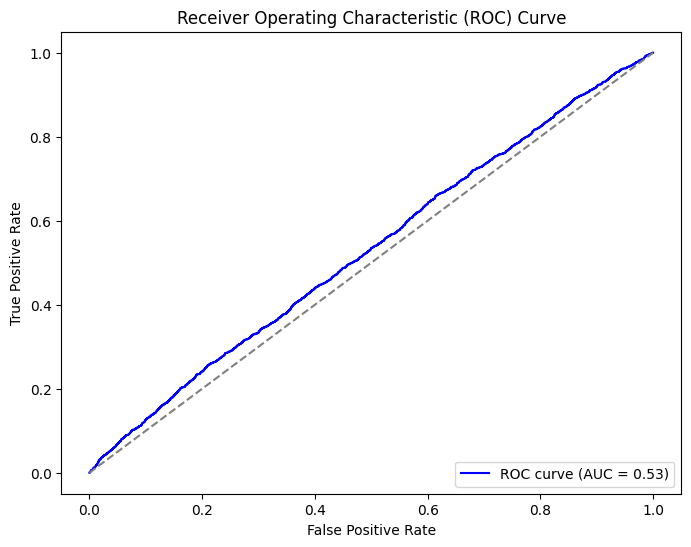

AUC: 0.53


In [95]:
plot_roc_auc(tuned_log_reg, X_test, y_test)

In [96]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Evaluate Decision Tree using the evaluation function
evaluate_model(dt_model, X_train_balanced, y_train_balanced, X_test, y_test)

Model: DecisionTreeClassifier
Accuracy: 0.7915
Precision: 0.1441
Recall: 0.1660
F1 Score: 0.1543
Confusion Matrix:
 [[15114  2210]
 [ 1869   372]]

------------------------------



(0.7915154612829032,
 np.float64(0.14407436096049575),
 np.float64(0.16599732262382866),
 np.float64(0.15426083350611652))

In [97]:
# Define a refined parameter grid for Decision Tree
param_grid_dt_refined = {
    'max_depth': [10, 15, 20, 25, None],  # Increase max depth range
    'min_samples_split': [5, 10, 20],  # Larger minimum samples per split
    'min_samples_leaf': [1, 5, 10, 20],  # Larger minimum samples per leaf
    'class_weight': ['balanced', None]  # Adjust for class imbalance
}

# Set up GridSearchCV for Decision Tree with the refined parameter grid
grid_search_dt_refined = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                      param_grid=param_grid_dt_refined,
                                      scoring='f1', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_dt_refined.fit(X_train_balanced, y_train_balanced)

# Get the best model from the refined GridSearchCV
best_dt_model_refined = grid_search_dt_refined.best_estimator_

# Print the best parameters
print("Best parameters for Decision Tree (Refined):", grid_search_dt_refined.best_params_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters for Decision Tree (Refined): {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [98]:
# Evaluate the tuned Decision Tree model
print("Evaluating the best Decision Tree model:")
evaluate_model(best_dt_model_refined, X_train_balanced, y_train_balanced, X_test, y_test)

Evaluating the best Decision Tree model:
Model: DecisionTreeClassifier
Accuracy: 0.8041
Precision: 0.1478
Recall: 0.1490
F1 Score: 0.1484
Confusion Matrix:
 [[15398  1926]
 [ 1907   334]]

------------------------------



(0.8040889343214924,
 np.float64(0.14778761061946902),
 np.float64(0.14904060687193219),
 np.float64(0.14841146411908465))

In [99]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Evaluate Gradient Boosting using the evaluation function
evaluate_model(gb_model, X_train_balanced, y_train_balanced, X_test, y_test)

Model: GradientBoostingClassifier
Accuracy: 0.8815
Precision: 0.2230
Recall: 0.0138
F1 Score: 0.0261
Confusion Matrix:
 [[17216   108]
 [ 2210    31]]

------------------------------



(0.881523128034756,
 np.float64(0.22302158273381295),
 np.float64(0.013833110218652387),
 np.float64(0.026050420168067228))

In [100]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Evaluate Random Forest using the evaluation function
evaluate_model(rf_model, X_train_balanced, y_train_balanced, X_test, y_test)

Model: RandomForestClassifier
Accuracy: 0.8825
Precision: 0.2062
Recall: 0.0089
F1 Score: 0.0171
Confusion Matrix:
 [[17247    77]
 [ 2221    20]]

------------------------------



(0.8825453616151291,
 np.float64(0.20618556701030927),
 np.float64(0.00892458723784025),
 np.float64(0.01710863986313088))

In [101]:
# Define a refined parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Increase the number of trees
    'max_depth': [10, 15, 20, None],  # Different depths, with None allowing full depth
    'min_samples_split': [5, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples required at a leaf node
    'class_weight': ['balanced', None]  # Adjusting class weights for imbalance
}


# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              scoring='f1', cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Get the best model from the refined GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Print the best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [95]:
# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

# Train the model on the balanced training data
best_rf_model.fit(X_train_balanced, y_train_balanced)

# Evaluate the model on the test data
evaluate_model(best_rf_model, X_train_balanced, y_train_balanced, X_test, y_test)

Model: RandomForestClassifier
Accuracy: 0.8832
Precision: 0.2442
Recall: 0.0094
F1 Score: 0.0180
Confusion Matrix:
 [[17259    65]
 [ 2220    21]]

------------------------------



(0.8832098134423716,
 np.float64(0.2441860465116279),
 np.float64(0.009370816599732263),
 np.float64(0.018048990116029222))

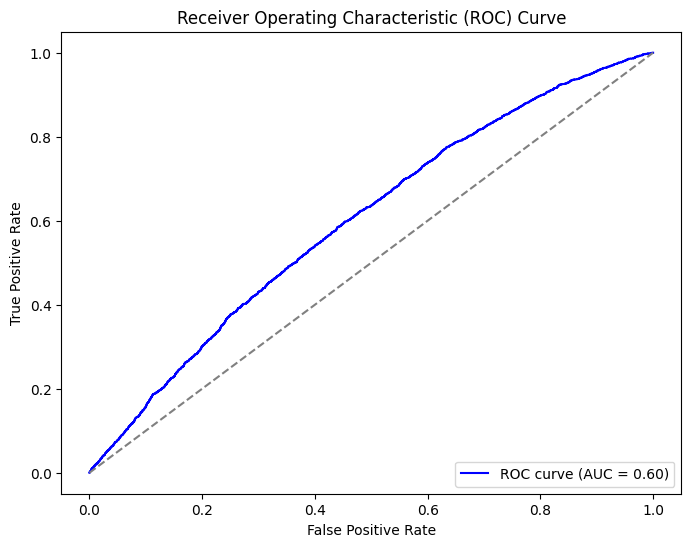

AUC: 0.60


In [102]:
plot_roc_auc(best_rf_model, X_test, y_test)

In [103]:
# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Evaluate Naive Bayes using the evaluation function
evaluate_model(nb_model, X_train_balanced, y_train_balanced, X_test, y_test)

Model: GaussianNB
Accuracy: 0.3057
Precision: 0.1134
Recall: 0.7425
F1 Score: 0.1968
Confusion Matrix:
 [[ 4317 13007]
 [  577  1664]]

------------------------------



(0.30569895221058013,
 np.float64(0.11342103469429486),
 np.float64(0.7425256581883088),
 np.float64(0.1967833491012299))

In [104]:
# Define the parameter grid for Gaussian Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Range of smoothing values
}

# Set up GridSearchCV for Naive Bayes
grid_search_nb = GridSearchCV(estimator=GaussianNB(),
                              param_grid=param_grid_nb,
                              scoring='f1', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_nb.fit(X_train_balanced, y_train_balanced)

# Get the best model from GridSearchCV
best_nb_model = grid_search_nb.best_estimator_

# Print the best parameters
print("Best parameters for Gaussian Naive Bayes:", grid_search_nb.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Gaussian Naive Bayes: {'var_smoothing': 1e-05}


In [105]:
# Evaluate the tuned Naive Bayes model with refined parameters

print("Evaluating the refined Naive Bayes model:")
evaluate_model(best_nb_model, X_train_balanced, y_train_balanced, X_test, y_test)

Evaluating the refined Naive Bayes model:
Model: GaussianNB
Accuracy: 0.3569
Precision: 0.1140
Recall: 0.6814
F1 Score: 0.1953
Confusion Matrix:
 [[ 5455 11869]
 [  714  1527]]

------------------------------



(0.3568617429082545,
 np.float64(0.11398925052254404),
 np.float64(0.6813922356091031),
 np.float64(0.19530600498816908))

In [106]:
# Scale the features (Neural networks generally perform better with scaled inputs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
    return model

# Compile the model
model = create_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_balanced, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6812 - loss: 0.5913 - val_accuracy: 0.5966 - val_loss: 0.6935
Epoch 2/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7430 - loss: 0.5220 - val_accuracy: 0.6223 - val_loss: 0.6488
Epoch 3/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7740 - loss: 0.4758 - val_accuracy: 0.7056 - val_loss: 0.5362
Epoch 4/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7926 - loss: 0.4468 - val_accuracy: 0.7435 - val_loss: 0.4769
Epoch 5/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8025 - loss: 0.4280 - val_accuracy: 0.7563 - val_loss: 0.4540
Epoch 6/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8116 - loss: 0.4121 - val_accuracy: 0.7576 - val_loss: 0.4505
Epoch 7/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8162 - loss: 0.4057 - val_accuracy: 0.7886 - val_loss: 0.3953
Epoch 8/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8203 - loss: 0.39

In [107]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate additional metrics using the evaluation function
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Compute additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Neural Network Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", cm)


612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7946 - loss: 0.5001
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Accuracy: 0.7985
Precision: 0.1504
Recall: 0.1633
F1 Score: 0.1566
Confusion Matrix:
 [[15257  2067]
 [ 1875   366]]


In [109]:
import keras_tuner as kt

In [ ]:
# Define the model-building function for Keras Tuner
def build_tuned_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_layer1', min_value=32, max_value=128, step=32), activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(hp.Int('units_layer2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Clear the tuner directory
shutil.rmtree('tuner_dir', ignore_errors=True)

# Initialize Keras Tuner
tuner = kt.RandomSearch(build_tuned_model, objective='val_accuracy', max_trials=5, executions_per_trial=1, directory='tuner_dir', project_name='nn_tuning')

# Run the tuner
tuner.search(X_train_scaled, y_train_balanced, epochs=20, validation_split=0.2)

Trial 5 Complete [00h 03m 13s]
val_accuracy: 0.8521124124526978

Best val_accuracy So Far: 0.8647039532661438
Total elapsed time: 00h 16m 13s


In [112]:
# Initialize the tuner with overwrite=True
tuner = kt.RandomSearch(build_tuned_model, objective='val_accuracy', max_trials=5, executions_per_trial=1, directory='tuner_dir', project_name='nn_tuning', overwrite=True)

# Run the tuner
tuner.search(X_train_scaled, y_train_balanced, epochs=20, validation_split=0.2)

Trial 5 Complete [00h 03m 07s]
val_accuracy: 0.7943500280380249

Best val_accuracy So Far: 0.898546040058136
Total elapsed time: 00h 15m 56s


In [113]:
# Retrieve the best hyperparameters without loading the model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Rebuild the model with the best hyperparameters
best_nn_model = build_tuned_model(best_hp)

# Train the model from scratch with the best hyperparameters
best_nn_model.fit(X_train_scaled, y_train_balanced, epochs=20, validation_split=0.2)

# Evaluate the model on the test set
best_nn_model.evaluate(X_test_scaled, y_test)

Epoch 1/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6898 - loss: 0.5910 - val_accuracy: 0.6396 - val_loss: 0.6738
Epoch 2/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7435 - loss: 0.5264 - val_accuracy: 0.6798 - val_loss: 0.6042
Epoch 3/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7744 - loss: 0.4847 - val_accuracy: 0.7391 - val_loss: 0.5130
Epoch 4/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7927 - loss: 0.4553 - val_accuracy: 0.8937 - val_loss: 0.3049
Epoch 5/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8051 - loss: 0.4372 - val_accuracy: 0.6640 - val_loss: 0.6332
Epoch 6/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8108 - loss: 0.4220 - val_accuracy: 0.8348 - val_loss: 0.3636
Epoch 7/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8210 - loss: 0.4060 - val_accuracy: 0.7662 - val_loss: 0.4582
Epoch 8/20
3465/3465 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8231 - loss: 0.3

[0.5161132216453552, 0.8008177876472473]

In [114]:
# Evaluate the best-tuned model on the test set
test_loss, test_accuracy = best_nn_model.evaluate(X_test_scaled, y_test, verbose=1)
y_pred = (best_nn_model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Neural Network Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", cm)


612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8004 - loss: 0.5145
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Test Accuracy: 0.8008
Precision: 0.1533
Recall: 0.1633
F1 Score: 0.1581
Confusion Matrix:
 [[15302  2022]
 [ 1875   366]]


In [115]:
# Initialize the SGD model
sgd_model = SGDClassifier(random_state=42)

# Evaluate SGD using the evaluation function
evaluate_model(sgd_model, X_train_balanced, y_train_balanced, X_test, y_test)


Model: SGDClassifier
Accuracy: 0.5885
Precision: 0.1264
Recall: 0.4386
F1 Score: 0.1963
Confusion Matrix:
 [[10531  6793]
 [ 1258   983]]

------------------------------



(0.5884998722208025,
 np.float64(0.12641460905349794),
 np.float64(0.4386434627398483),
 np.float64(0.19626634720974342))

In [116]:
# Define a corrected parameter grid for SGD
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'eta0': [0.01, 0.1],  # Initial learning rate
    'max_iter': [1000, 1500, 2000]
}

# Ensure 'eta0' is compatible with 'constant' and 'adaptive' learning rates
# For the 'optimal' setting, eta0 is not required, but we include it in the grid to avoid issues.
grid_search_sgd = GridSearchCV(estimator=SGDClassifier(random_state=42),
                               param_grid=param_grid_sgd,
                               scoring='f1', cv=5, n_jobs=-1, verbose=1, error_score='raise')

# Fit GridSearchCV to the training data
grid_search_sgd.fit(X_train_balanced, y_train_balanced)

# Get the best model from the refined GridSearchCV
best_sgd_model = grid_search_sgd.best_estimator_

# Print the best parameters
print("Best parameters for SGD:", grid_search_sgd.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for SGD: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'optimal', 'max_iter': 1000, 'penalty': 'l2'}


In [117]:
# Evaluate the tuned SGD model with the best parameters
evaluate_model(best_sgd_model, X_train_balanced, y_train_balanced, X_test, y_test)

Model: SGDClassifier
Accuracy: 0.5885
Precision: 0.1264
Recall: 0.4386
F1 Score: 0.1963
Confusion Matrix:
 [[10531  6793]
 [ 1258   983]]

------------------------------



(0.5884998722208025,
 np.float64(0.12641460905349794),
 np.float64(0.4386434627398483),
 np.float64(0.19626634720974342))

In [ ]:
# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)

# Evaluate AdaBoost using the evaluation function
evaluate_model(ada_model, X_train_balanced, y_train_balanced, X_test, y_test)

Model: AdaBoostClassifier
Accuracy: 0.7611
Precision: 0.1399
Recall: 0.2111
F1 Score: 0.1683
Confusion Matrix:
 [[14417  2907]
 [ 1768   473]]

------------------------------



(0.7610529005877843,
 np.float64(0.13994082840236685),
 np.float64(0.2110664881749219),
 np.float64(0.16829745596868884))

In [ ]:
# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Set up GridSearchCV for AdaBoost with algorithm='SAMME'
grid_search_ada = GridSearchCV(
    estimator=AdaBoostClassifier(algorithm='SAMME', random_state=42),
    param_grid=param_grid_ada,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search_ada.fit(X_train_balanced, y_train_balanced)

# Get the best model from GridSearchCV
best_ada_model = grid_search_ada.best_estimator_

# Print the best parameters
print("Best parameters for AdaBoost:", grid_search_ada.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}


In [ ]:
# Initialize the AdaBoost model with the best parameters
best_ada_model = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)

# Train the model on the balanced training data
best_ada_model.fit(X_train_balanced, y_train_balanced)

# Evaluate the model on the test data
evaluate_model(best_ada_model, X_train_balanced, y_train_balanced, X_test, y_test)

Model: AdaBoostClassifier
Accuracy: 0.8458
Precision: 0.1523
Recall: 0.0759
F1 Score: 0.1013
Confusion Matrix:
 [[16378   946]
 [ 2071   170]]

------------------------------



(0.8457960644007155,
 np.float64(0.15232974910394265),
 np.float64(0.07585899152164212),
 np.float64(0.1012809055704498))

In [120]:
# Initialize the AdaBoost model with the best parameters
best_ada_model = AdaBoostClassifier(learning_rate=1.0, n_estimators=200, random_state=42)

# Fit the model to the balanced training set
best_ada_model.fit(X_train_balanced, y_train_balanced)

# Evaluate the tuned AdaBoost model using the evaluation function
evaluate_model(best_ada_model, X_train_balanced, y_train_balanced, X_test, y_test)

Model: AdaBoostClassifier
Accuracy: 0.8634
Precision: 0.2033
Recall: 0.0660
F1 Score: 0.0997
Confusion Matrix:
 [[16744   580]
 [ 2093   148]]

------------------------------



(0.8633784819831332,
 np.float64(0.2032967032967033),
 np.float64(0.06604194556001784),
 np.float64(0.0996968676321994))

In [122]:
# Initialize Logistic Regression with class_weight set to 'balanced'
balanced_log_reg_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Evaluate the model with the evaluation function
evaluate_model(balanced_log_reg_model, X_train, y_train, X_test, y_test)

Model: LogisticRegression
Accuracy: 0.6568
Precision: 0.1794
Recall: 0.5587
F1 Score: 0.2716
Confusion Matrix:
 [[11599  5725]
 [  989  1252]]

------------------------------



(0.6568361870687452,
 np.float64(0.17944675361903398),
 np.float64(0.5586791610887997),
 np.float64(0.2716424387068778))

In [129]:
# Define the hyperparameter grid with compatible solver and penalty combinations
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'class_weight': ['balanced', None]},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear', 'saga', 'lbfgs'], 'class_weight': ['balanced', None]},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'class_weight': ['balanced', None]},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['none'], 'solver': ['lbfgs'], 'class_weight': ['balanced', None]}
]

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

# Use the best model from grid search
tuned_balanced_log_reg = grid_search.best_estimator_

# Evaluate the tuned model on test data
evaluate_model(tuned_balanced_log_reg, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Best parameters found: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 score: 0.2661837957784872
Model: LogisticRegression
Accuracy: 0.6568
Precision: 0.1793
Recall: 0.5578
F1 Score: 0.2713
Confusion Matrix:
 [[11601  5723]
 [  991  1250]]

------------------------------



(0.6568361870687452,
 np.float64(0.17926287107414313),
 np.float64(0.5577867023650156),
 np.float64(0.2713262426741914))

In [98]:
# Initialize the Logistic Regression model with the best parameters
best_log_reg_model = LogisticRegression(
    C=0.1,
    class_weight='balanced',
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

# Train the model on the training data
best_log_reg_model.fit(X_train, y_train)

# Evaluate the model on the test data
evaluate_model(best_log_reg_model, X_train, y_train, X_test, y_test)

Model: LogisticRegression
Accuracy: 0.6568
Precision: 0.1793
Recall: 0.5578
F1 Score: 0.2713
Confusion Matrix:
 [[11601  5723]
 [  991  1250]]

------------------------------



(0.6568361870687452,
 np.float64(0.17926287107414313),
 np.float64(0.5577867023650156),
 np.float64(0.2713262426741914))

In [99]:
# Initialize Balanced Random Forest
brf_model = BalancedRandomForestClassifier(random_state=42, n_estimators=200)

# Evaluate the model with the evaluation function
evaluate_model(brf_model, X_train, y_train, X_test, y_test)

Model: BalancedRandomForestClassifier
Accuracy: 0.6205
Precision: 0.1716
Recall: 0.6046
F1 Score: 0.2674
Confusion Matrix:
 [[10785  6539]
 [  886  1355]]

------------------------------



(0.6204957832864809,
 np.float64(0.17164935393970104),
 np.float64(0.6046407853636769),
 np.float64(0.26739023186975824))

In [100]:
# Initialize Random Forest with class_weight set to 'balanced'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Evaluate the model with the evaluation function
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

Model: RandomForestClassifier
Accuracy: 0.8855
Precision: 0.5000
Recall: 0.0058
F1 Score: 0.0115
Confusion Matrix:
 [[17311    13]
 [ 2228    13]]

------------------------------



(0.8854587273191924,
 np.float64(0.5),
 np.float64(0.005800981704596163),
 np.float64(0.011468901632112925))

In [ ]:
# Use the best parameters found from GridSearchCV
best_params = {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

tuned_brf_model = BalancedRandomForestClassifier(
    random_state=42,
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators']
)

# Fit the model on the training data
tuned_brf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tuned_brf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Balanced Random Forest Classifier Evaluation")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Balanced Random Forest Classifier Evaluation
Accuracy: 0.6203935599284437
Precision: 0.175062656641604
Recall: 0.6233824185631415
F1 Score: 0.273358771157421
Confusion Matrix:
 [[10741  6583]
 [  844  1397]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.62      0.74     17324
           1       0.18      0.62      0.27      2241

    accuracy                           0.62     19565
   macro avg       0.55      0.62      0.51     19565
weighted avg       0.84      0.62      0.69     19565



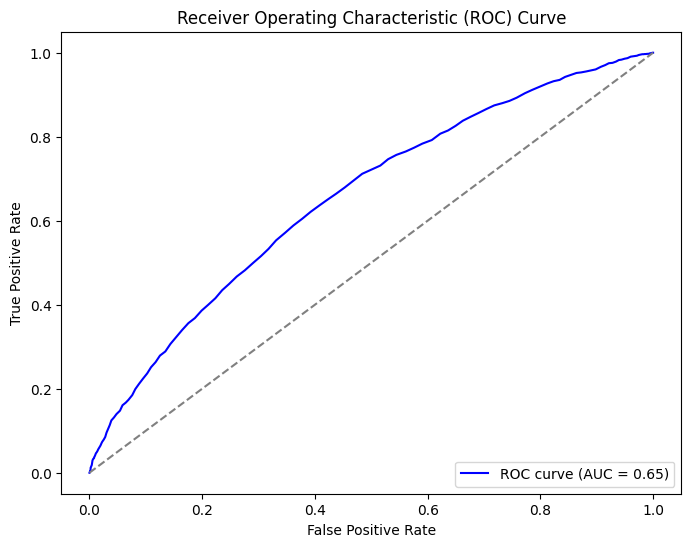

AUC: 0.65


In [133]:
# Generate predicted probabilities for the positive class (class 1)
y_proba = brf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC value for reference
print(f"AUC: {roc_auc:.2f}")

In [102]:
# Calculate scale_pos_weight based on class imbalance
scale_pos_weight = len(y_train) / sum(y_train) - 1

# Initialize XGBoost with scale_pos_weight
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, n_estimators=200, learning_rate=0.1)

# Evaluate the model with the evaluation function
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

Model: XGBClassifier
Accuracy: 0.6799
Precision: 0.1817
Recall: 0.5123
F1 Score: 0.2683
Confusion Matrix:
 [[12154  5170]
 [ 1093  1148]]

------------------------------



(0.679887554306159,
 np.float64(0.18170307059195948),
 np.float64(0.5122713074520303),
 np.float64(0.2682556373408108))

## Feature Importance Visualization for Top Models

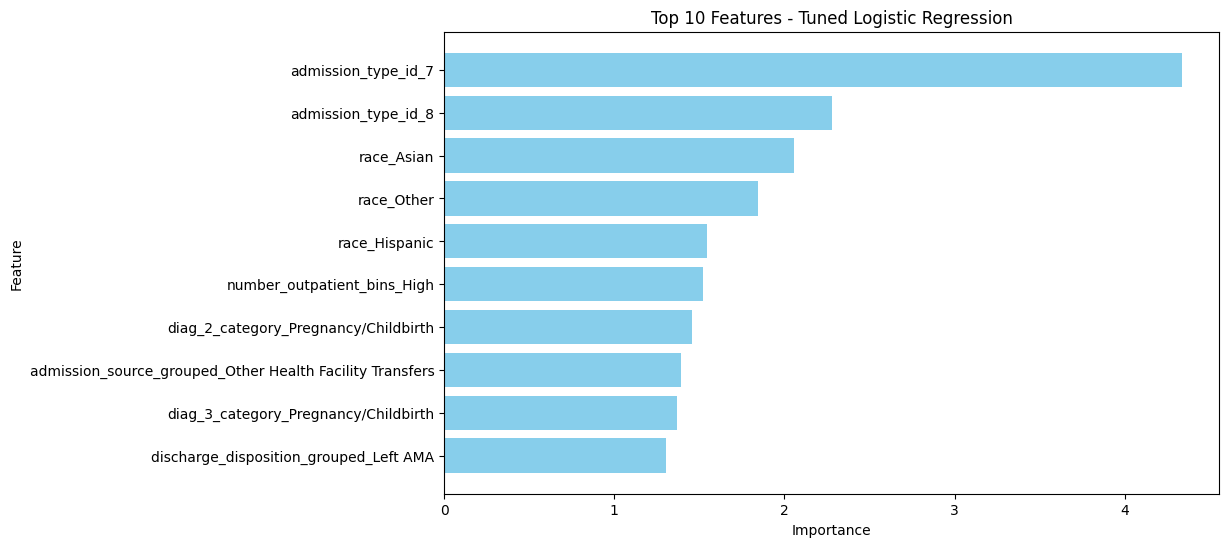

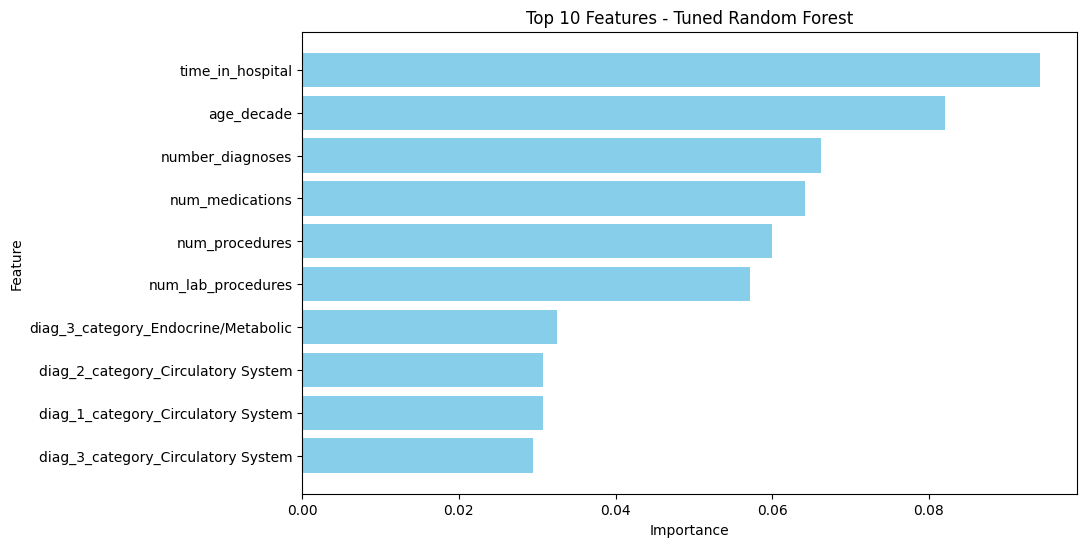

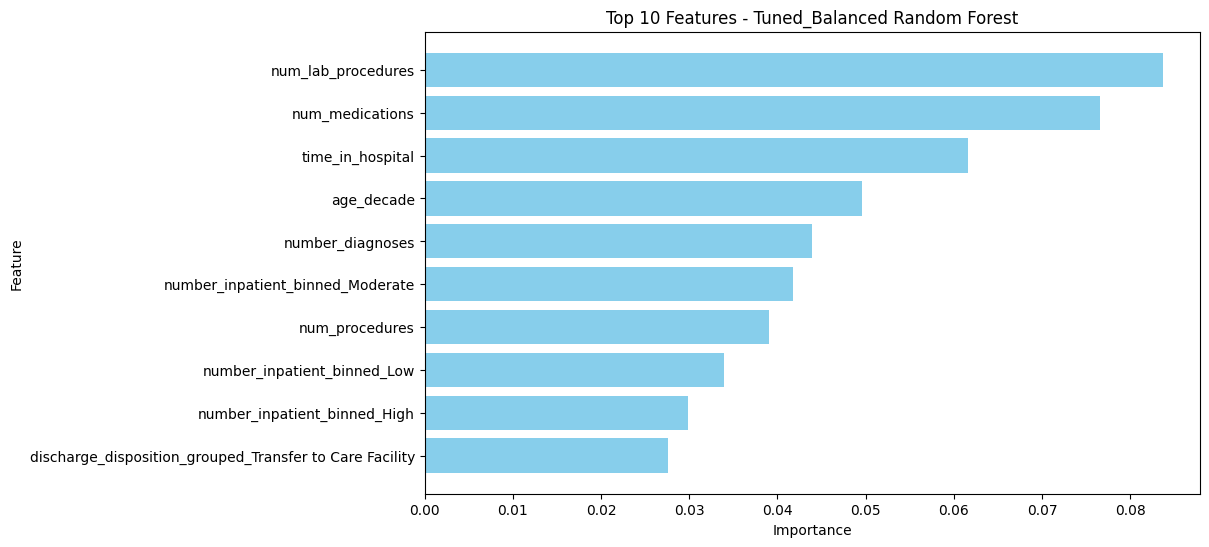

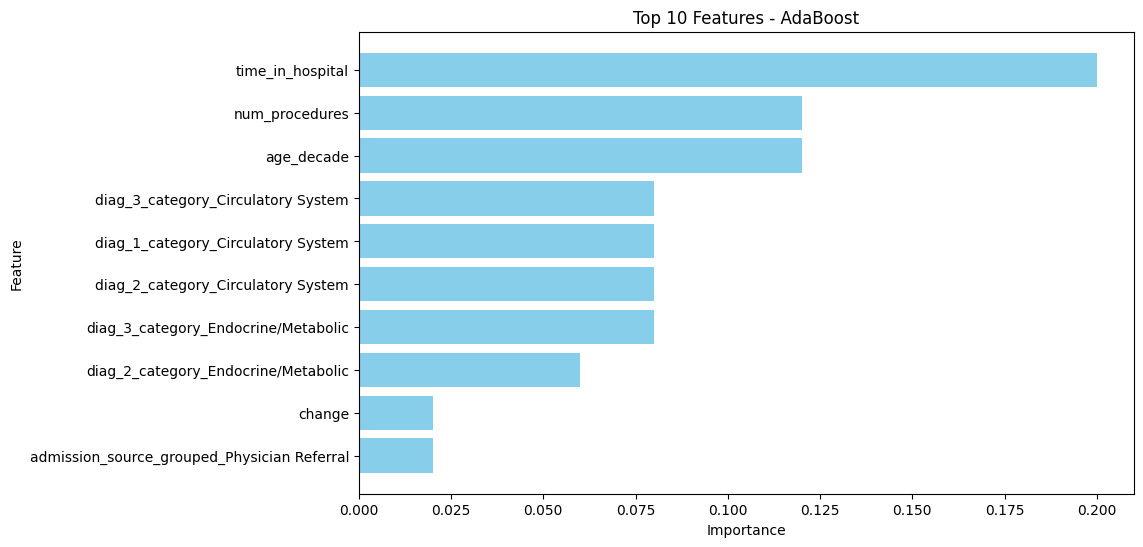

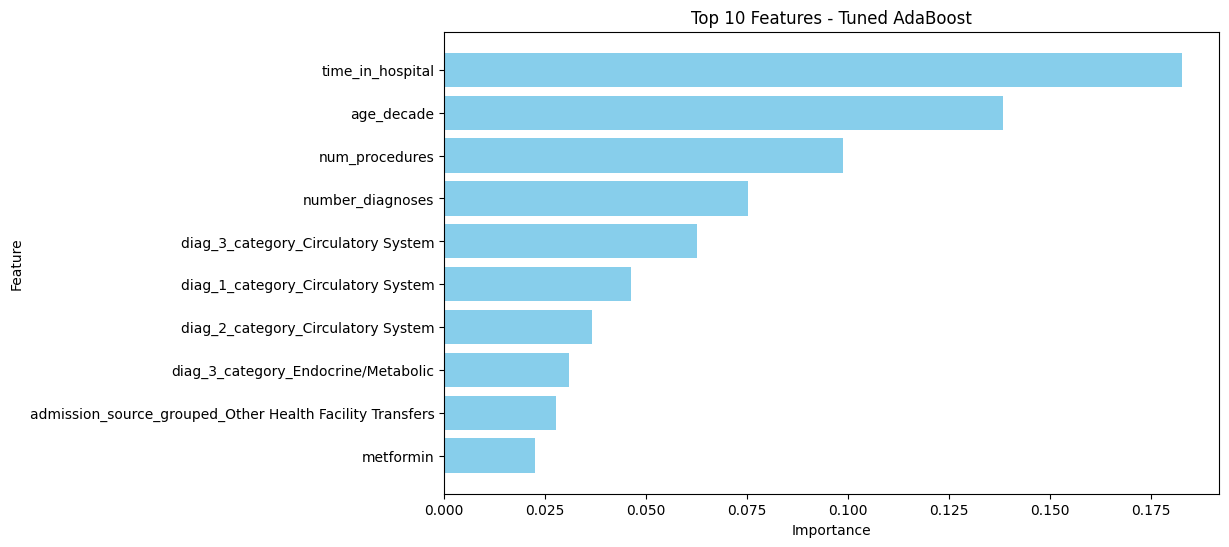

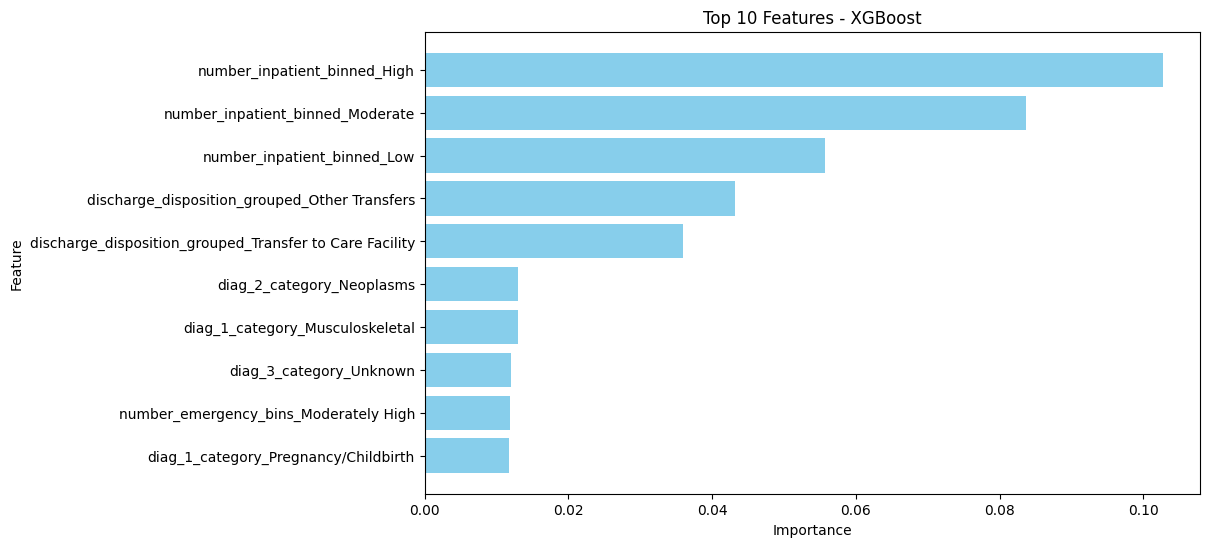

In [ ]:
def plot_top_features(models, model_names, X_test, y_test, feature_names):
    """
    Plots the top 10 features by importance for each model in the provided list.

    Parameters:
    models : list
        List of trained models to evaluate.
    model_names : list
        List of names corresponding to each model.
    X_test : DataFrame
        Test set features.
    y_test : array-like
        True labels for the test set.
    feature_names : list
        Names of the features in X_test.
    """
    for model, name in zip(models, model_names):
        plt.figure(figsize=(10, 6))
        
        # Check if model provides feature_importances_ or coef_
        if hasattr(model, "feature_importances_"):
            # Tree-based models
            importances = model.feature_importances_
        elif hasattr(model, "coef_"):
            # Linear models, use absolute value of coefficients
            importances = np.abs(model.coef_).flatten()
        else:
            # For models without built-in feature importance, use permutation importance
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
            importances = result.importances_mean
        
        # Get top 10 features by importance
        top_indices = np.argsort(importances)[-10:][::-1]
        top_features = [(feature_names[i], importances[i]) for i in top_indices]
        
        # Create a DataFrame for top features to plot
        top_features_df = pd.DataFrame(top_features, columns=['Feature', 'Importance'])
        
        # Plot top features
        plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title(f'Top 10 Features - {name}')
        plt.gca().invert_yaxis()
        plt.show()

models = [best_log_reg_model, best_rf_model, tuned_brf_model, ada_model, best_ada_model, xgb_model]
feature_names = X_selected.columns
model_names = ['Tuned Logistic Regression', 'Tuned Random Forest', 'Tuned_Balanced Random Forest', 'AdaBoost', 'Tuned AdaBoost', 'XGBoost']

plot_top_features(models, model_names, X_test, y_test, feature_names)

## ROC and AUC Analysis for Model Comparison for the best performing models

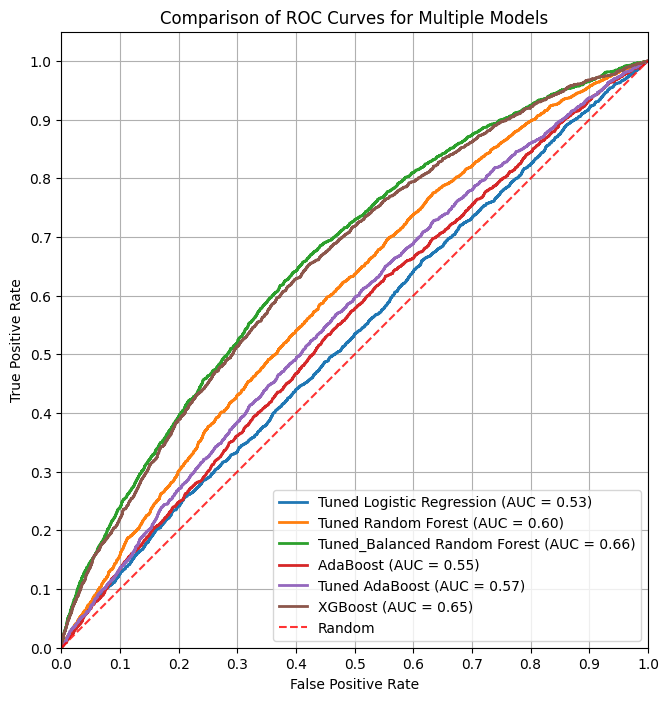

In [ ]:
def compare_roc_auc(models, model_names, X_test, y_test):
    """
    Plots the ROC curve for each model and compares AUC scores.

    Parameters:
    models : list
        List of trained models to evaluate.
    model_names : list
        List of model names corresponding to each model in `models`.
    X_test : array-like
        Test features.
    y_test : array-like
        True labels for the test set.
    """
    plt.figure(figsize=(8, 8))
    
    for model, name in zip(models, model_names):
        # Generate probability scores or decision function for the positive class
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot each model's ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot the random (diagonal) line
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random', alpha=0.8)
    
    # Plot settings
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparison of ROC Curves for Multiple Models')
    plt.legend(loc="lower right")
    plt.gca().set_aspect('equal')
    plt.show()

# Example usage:
# Assume you have already trained these models and stored them in variables
# log_reg_model, rf_model, ada_model, tuned_ada_model, dt_model

models = [best_log_reg_model, best_rf_model, tuned_brf_model, ada_model, best_ada_model, xgb_model]
model_names = ['Tuned Logistic Regression', 'Tuned Random Forest', 'Tuned_Balanced Random Forest', 'AdaBoost', 'Tuned AdaBoost', 'XGBoost']

compare_roc_auc(models, model_names, X_test, y_test)

## More classifiers

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

# Train and evaluate the model
evaluate_model(mlp_model, X_train_scaled, y_train, X_test_scaled, y_test)

Model: MLPClassifier
Accuracy: 0.8554
Precision: 0.2162
Recall: 0.1000
F1 Score: 0.1367
Confusion Matrix:
 [[16512   812]
 [ 2017   224]]

------------------------------



(0.8554050600562229,
 np.float64(0.21621621621621623),
 np.float64(0.0999553770638108),
 np.float64(0.1367104058590174))

In [113]:
# Define the parameter grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200, 300]
}

# Set up GridSearchCV for MLP
grid_search_mlp = GridSearchCV(estimator=MLPClassifier(random_state=42),
                               param_grid=param_grid_mlp,
                               scoring='f1', cv=3, n_jobs=-1, verbose=1)



# Fit GridSearchCV to the training data
grid_search_mlp.fit(X_train_scaled, y_train)

# Get the best model from GridSearchCV
best_mlp_model = grid_search_mlp.best_estimator_

# Print the best parameters
print("Best parameters for MLP:", grid_search_mlp.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Best parameters for MLP: {'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 300}


In [114]:
# Evaluate the tuned MLP model
evaluate_model(best_mlp_model, X_train_scaled, y_train, X_test_scaled, y_test)

Model: MLPClassifier
Accuracy: 0.8108
Precision: 0.1776
Recall: 0.1794
F1 Score: 0.1785
Confusion Matrix:
 [[15462  1862]
 [ 1839   402]]

------------------------------



(0.810835675951955,
 np.float64(0.1775618374558304),
 np.float64(0.17938420348058903),
 np.float64(0.17846836847946726))

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train and evaluate the model using the evaluation function
evaluate_model(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Model: SVC
Accuracy: 0.8855
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
 [[17324     0]
 [ 2241     0]]

------------------------------



(0.8854587273191924, np.float64(0.0), np.float64(0.0), np.float64(0.0))

### Summary of the best models:


1. **XGBClassifier and Tuned Balanced Random Forest**  
   - Balances precision and recall effectively for identifying readmissions.
   - **Confusion Matrix Details** XGBClassifier correctly identifies 12154 true positives but has 5170 false negatives (missed readmissions).
     

2. **Balanced Logistic Regression**  
   - Exhibits high recall compared to most models, catching more readmissions.
   - **Confusion Matrix Details**: 11601 true positives; 5725 false negatives.

     
3. **Logistic Regression**  
   - Shows lower recall compared to its balanced counterpart but remains simple and interpretable.
   - **Confusion Matrix Details**: 11393 true positives; 5931 false negatives.

     
4. **Balanced Random Forest Classifier**  
   - Achieves the highest recall among all models, although with a trade-off of lower precision.
   - **Confusion Matrix Details**: 10785 true positives; 6539 false negatives.
     

5. **MLPClassifier**  
   - Demonstrates high overall accuracy, though with moderate recall and precision.
   - **Confusion Matrix Details**: 15462 true positives; 1862 false negativesa
- **Tuned Balanced Random Forest** is the best model.nced Random Forest     

- **XGBClassifier** and **Balanced  alsoLogistic Regression** are strong contenders, providing a good balance of precision and recall, with XGBClassifier slightly lead
  ing in terms of F1 Score.
- If **maximizing recall** (catching as many readmissions as possible) is a priority, then the **Balanced Random Forest Classifier** would be the best choice due to its high recall. Low precision result